# Vehicle_Multi_Class_Classification

**This project was created entirely by me: Ali Haidar Ahmad.**

I'm gonna build a machine learning model that can classify different types of vehicles (Suv, Sedan, pickup, ..etc) based on their features.

## Setup the workspace

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Work directory
%cd '/content/drive/MyDrive/Colab Notebooks/projects/Vehicle Multi-Class Classification/'

/content/drive/MyDrive/Colab Notebooks/projects/Vehicle Multi-Class Classification


## Download data

You can download the dataset from [here](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data).

In [ ]:
# !unzip 'archive.zip'

## Import the necessary packages

In [ ]:
%matplotlib inline
import time
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, randint, uniform
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, make_scorer, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from xgboost import XGBClassifier
import itertools

## Load data

In [ ]:
data = pd.read_csv("vehicles.csv")

## Spliting

We must separate the dataset from the beginning into a training set, a validation set, and a test set in order to avoid **[information leakage](https://machinelearningmastery.com/data-leakage-machine-learning/)**. It is not useful to conduct exploratory data analysis on all of the data and then take part of it to test the model.
* Training set for data analysis, study, feature engineering, and model building.
* Validation set to improve the model. Feature engineering is an iterative process that involves performing some operations on features and then observing their impact on the model. Of course, some kind of information leakage will occur here because we modify the features based on the performance on the validation set.
* Final test set. This collection will be clean of any analysis or spying, in order to get a fair evaluation.

In [ ]:
data, test_data = train_test_split(data, test_size=0.1, random_state=2024)
data, val_data = train_test_split(data, test_size=0.1, random_state=2024)

In [ ]:
data.shape

(345772, 26)

In [ ]:
val_data.shape

(38420, 26)

In [ ]:
test_data.shape

(42688, 26)

## Exploratory Data Analysis (EDA)

The famous saying **"one picture is worth a thousand words"** holds true in the scope of data visualizations as well.

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In this section we will:
1. Review and understand data.
2. Handling missing values.
3. Visualize data and understand relationships between features.
4. Handiling outliers.

### Understanding dataset & First toches

In [ ]:
# First look of data
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
198492,7313657207,https://detroit.craigslist.org/wyn/cto/d/dearb...,detroit metro,https://detroit.craigslist.org,4950,2007.0,pontiac,grand prix,excellent,6 cylinders,...,NaN,sedan,white,https://images.craigslist.org/01212_9qPg0DG2vM...,"2007 Pontiac Grand Prix only 75k miles, keyles...",NaN,mi,42.3349,-83.1801,2021-04-27T21:38:19-0400
274901,7316906981,https://newyork.craigslist.org/wch/cto/d/mamar...,new york city,https://newyork.craigslist.org,16500,2008.0,toyota,tacoma,excellent,6 cylinders,...,NaN,NaN,blue,https://images.craigslist.org/00m0m_eOQjZnjyoa...,"This truck has only ever had one owner, price ...",NaN,ny,40.9525,-73.7350,2021-05-04T16:00:36-0400
17145,7316835679,https://fayar.craigslist.org/ctd/d/clinton-cam...,fayetteville,https://fayar.craigslist.org,24683,2019.0,ford,flex,NaN,NaN,...,NaN,NaN,white,https://images.craigslist.org/00g0g_6F0WCKzsFA...,➔ Want to see more pictures?Paste this link to...,NaN,ar,38.4018,-93.7850,2021-05-04T13:03:25-0500
262501,7306571956,https://lascruces.craigslist.org/ctd/d/las-cru...,las cruces,https://lascruces.craigslist.org,16990,2014.0,acura,ilx 2.0l sedan 4d,good,NaN,...,NaN,sedan,silver,https://images.craigslist.org/00c0c_k5OJliN99J...,Carvana is the safer way to buy a car During t...,NaN,nm,32.3300,-106.7500,2021-04-14T04:50:31-0600
34522,7316092613,https://losangeles.craigslist.org/sgv/cto/d/on...,los angeles,https://losangeles.craigslist.org,15800,2003.0,lexus,gx470,good,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/01616_hgsTXwke3e...,"Hello, For sale my 2003 Lexus GX470. Currently...",NaN,ca,34.0763,-117.6254,2021-05-03T00:32:43-0700


In [ ]:
print('The dataset has %d examples and %d features.' % (data.shape[0], data.shape[1]))

The dataset has 345772 examples and 26 features.


In [ ]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# type information of each columns
data.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

It seems that we will be mainly dealing with categorical variables.

In [ ]:
# Let's take a look at our target's classes
data['type'].value_counts()

sedan          70632
SUV            62386
pickup         35276
truck          28597
other          17882
coupe          15606
hatchback      13366
wagon           8684
van             7008
convertible     6240
mini-van        3940
offroad          478
bus              426
Name: type, dtype: int64

---
The dataset comprises 345772 rows, each with 26 distinct attributes, detailed as follows:

| Feature            | Description                                                                      | Relevance  |
|--------------------|----------------------------------------------------------------------------------|------------|
| id                 | A unique identifier for each Craigslist ad.                                      | Irrelevant: Just a unique identifier with no relation to vehicle type. |
| url                | Web address for the car advertisement on Craigslist.                             | Irrelevant: The URL of the ad does not provide classification information. |
| region, region_url | City and specific Craigslist URL for vehicle sales within that city.             | Irrelevant: The sale location does not directly affect vehicle classification. |
| price              | Asking price for the vehicle, in US dollars.                                     | Irrelevant: While there may be trends, the price is not a reliable indicator of vehicle type. It also changes from year to year. |
| year               | Production year of the vehicle.                                                  | Irrelevant: Manufacturing year doesn't directly classify a vehicle, although certain years might correlate with vehicle types due to market trends. |
| manufacturer       | Company that manufactured the vehicle.                                           | Relevant: This can indicate the typical categories of vehicles produced by a manufacturer, as some specialize in certain types like trucks or sedans.   |
| model              | Specific model name or number of the vehicle.                                    | Relevant: The model can give specific insights into the vehicle type since certain models are known to be sedans, SUVs, etc.   |
| condition          | Vehicle's condition, categorized as new, like new, excellent, good, fair, salvage. | Relevant: The condition might indirectly affect the classification by highlighting models often used in conditions that are rough (e.g., trucks) versus those kept in 'like new' condition (e.g., luxury sedans).   |
| cylinders          | Count of cylinders in the vehicle's engine.                                      | Relevant: The number of cylinders can hint at the vehicle's size and purpose, as larger vehicles like trucks and SUVs often have more cylinders.   |
| fuel               | Type of fuel the vehicle uses.                                                   | Relevant: Fuel type can also be an indicator, as some vehicle types are more likely to use diesel (e.g., trucks) versus electric or hybrid (e.g., sedans, SUVs).   |
| odometer           | Car's mileage, indicating how many miles it has been driven.                     | Relevant: While not directly related to classification, mileage can indirectly suggest vehicle use and type.   |
| title_status       | Vehicle's legal status.                                                          | Irrelevant: The legal status of the car is irrelevant to its classification. |
| transmission       | Type of transmission in the vehicle.                                             | Relevant: Certain types of vehicles may predominantly use one transmission type over another (e.g., manual in sports cars).   |
| VIN                | Vehicle Identification Number, unique to each vehicle.                           | Irrelevant: This unique identifier provides specific information about the vehicle but is not useful for classification without decoding. |
| drive              | Vehicle's drive type.                                                            | Relevant: Drive type is closely related to vehicle classification (e.g., 4WD often found in SUVs and trucks).   |
| size               | Size classification of the vehicle's body.                                       | Relevant: Size is a direct indicator of vehicle type, as it distinguishes between compact cars, mid-size sedans, full-size SUVs, etc.   |
| type               | Body type of the vehicle.                                                        | Relevant   |
| paint_color        | Color of the vehicle's exterior paint.                                           | Irrelevant: While generally less informative, color can sometimes be indicative of certain vehicle types due to market trends.   |
| image_url          | Web address of the vehicle's main image in its Craigslist ad.                    | Irrelevant: Images could theoretically help with classification, but extracting relevant features from them requires complex image processing techniques. |
| county             | County in which the vehicle sale is taking place.                                | Irrelevant |
| state              | State where the sale is located, abbreviated.                                    | Irrelevant |
| lat, long          | Geographic coordinates of the sale.                                              | Irrelevant |
| posting_date       | Date and time when the ad was posted on Craigslist.                              | Irrelevant |
| description | A description of the vehicle | Irrelevant: While the description might contain relevant information, it is unstructured and would require significant natural language processing to extract useful features.  |


In [ ]:
# Drop irrelevant attributes
columns_to_drop = ['id', 'url', 'region', 'region_url', 'price', 'year', 'title_status',
                   'VIN', 'paint_color', 'image_url', 'county', 'state', 'lat', 'long',
                   'posting_date', 'description']

datasets = [data, val_data, test_data]

for dataset in datasets:
    dataset.drop(columns_to_drop, axis=1, inplace=True)

<br>

---
**Statistical summary of data frame using describe() function**

---

[describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) is used to view some basic statistical details like percentile, mean, std etc.

**Syntax:**

dataframe.describe(percentiles, include, exclude datetime_is_numeric)

* ***percentile:*** Optional, a list of percentiles to include in the result, default is [.25, .50, .75].
* ***include:*** Optional, a list of the data types to allow in the result.
* ***exclude:*** Optional, a list of the data types to disallow in the result.
* ***datetime_is_numeric:*** Optional, default False. Set to True to treat datetime data as numeric



For columns that contain numeric data, the description will contain this information for each column:

    * count - The number of not-empty values.
    * mean - The average (mean) value.
    * std - The standard deviation.
    * min - the minimum value.
    * 25% - The 25% percentile*.
    * 50% - The 50% percentile*.
    * 75% - The 75% percentile*.
    * max - the maximum value.


***Percentile meaning:*** how many of the values are less than the given percentile.

In [ ]:
data.describe()

,odometer
count,3.421380e+05
mean,9.808982e+04
std,2.156855e+05
min,0.000000e+00
25%,3.766625e+04
50%,8.550000e+04
75%,1.335380e+05
max,1.000000e+07


- From the above, we notice that there are missing values in `odometer` column.
- Through the values of the standard deviation, interquartile ratios, and the largest value, we notice a huge discrepancy between some values, which indicates the presence of outliers.
- In this scenario, to address outliers within the `odometer` column, we will first target and exclude values that are unrealistically high or low, as they can distort the analysis. Consequently, we will omit any vehicles reported to have over 250,000 miles or under 300 miles, unless they are specifically labeled as new. This step ensures the removal of extreme outliers from our dataset.

In [ ]:
def filter_odometer_data(df):
    """
    Removes rows from the dataframe where:
    - The odometer reading is less than 300 and the condition is not 'new'.
    - The odometer reading is greater than 250,000.

    Args:
    - df (pd.DataFrame): The dataframe to be filtered.

    Returns:
    - pd.DataFrame: The filtered dataframe.
    """
    # Find indexes of rows to be dropped
    low_odometer = df[(df["odometer"] < 300) & (df["condition"] != "new")].index
    high_odometer = df[df["odometer"] > 250000].index

    # Drop the rows and return the filtered dataframe
    df.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
    df.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

    return df

# Apply the filtering function to each of your datasets
data = filter_odometer_data(data)
val_data = filter_odometer_data(val_data)
test_data = filter_odometer_data(test_data)

In [ ]:
data.describe(include=['O'])

,manufacturer,model,condition,cylinders,fuel,transmission,drive,size,type
count,321044,329531,198212,195505,330933,331320,233126,94472,262874
unique,42,25298,6,8,5,3,3,4,13
top,ford,f-150,good,6 cylinders,gas,automatic,4wd,full-size,sedan
freq,55278,6370,95443,73993,279707,263132,103437,49325,69427


- We notice that there are missing values in all columns.
- We note that the `model` column has high **cardinality**, which has high impacts on computational efficiency and may require more unavailable resources. High cardinality can also lead to issues such as overfitting, where the model learns to make predictions based on the noise specific to the training data rather than on the underlying patterns that generalize well to unseen data. It may be a reasonable option in these cases to do feature engineering and compile some classes, but this may require domain expertise. So deleting this column would be a good idea.

In [ ]:
for dataset in datasets:
    dataset.drop('model', axis=1, inplace=True)

### Handling missing values

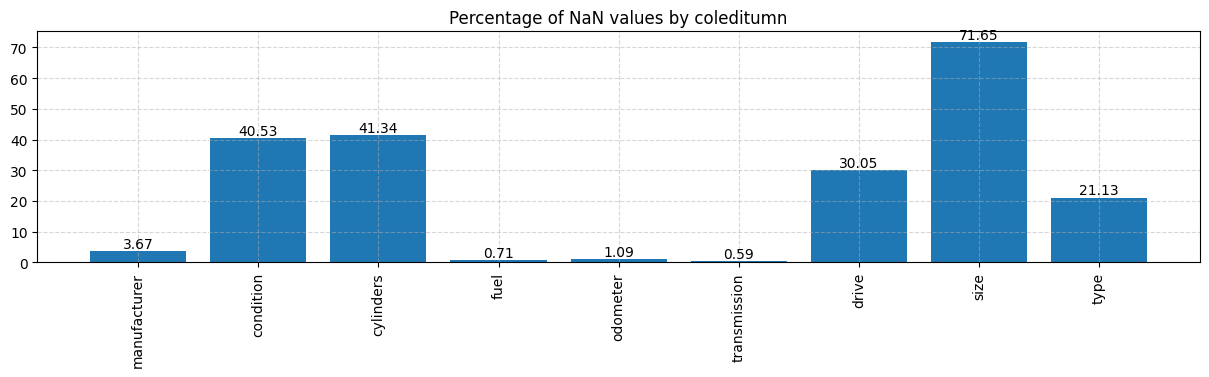

In [ ]:
# Let's look at the percentage of missing values in each column
fig, ax = plt.subplots(figsize=[15, 3])
bars = ax.bar(x=data.columns, height=round(data.isna().sum() / data.shape[0] * 100, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of NaN values by coleditumn")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

In [ ]:
# Let's express this numerically as well
data.isna().sum()

manufacturer     12244
condition       135076
cylinders       137783
fuel              2355
odometer          3634
transmission      1968
drive           100162
size            238816
type             70414
dtype: int64

- As we can see, there is also a high presence of NaN values in the columns.
- There are 70414 missing values in the `type` column, so we can delete all the corresponding records because they are unlabeled. Although this is a large amount to delete, it takes time to try to guess the types of these records or some of them.
- We can also delete records corresponding to columns with a percentage of missing values of 5% or less. But we will exclude the `odometer` column from this for now.
- As for the `condition` column, it is obvious that we can infer the missing values in it through the `odometer` column.

In [ ]:
for dataset in datasets:
    dataset.dropna(subset=['type', 'manufacturer', 'fuel', 'transmission'], inplace=True)

- Now for the `odometer` column we will look at the relationship between it and the `condition` column. Hence we can take the average value as per the `condition` to fill the missing values in the `odometer` column. But this is not enough, as there are some missing values in the `condition` column already. Therefore, we delete the remaining records.

In [ ]:
# What we are doing here is finding the average value of the odometer readings grouped by conditions
new_odo_mean = data[data['condition'] == 'new']['odometer'].mean()
like_new_odo_mean = data[data['condition'] == 'like new']['odometer'].mean()
excellent_odo_mean = data[data['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = data[data['condition'] == 'good']['odometer'].mean()
salvage_odo_mean = data[data['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = data[data['condition'] == 'fair']['odometer'].mean()

print('new average odometer:', round(new_odo_mean,2))
print('Like new average odometer:', round(like_new_odo_mean,2))
print('Excellent average odometer:', round(excellent_odo_mean,2))
print('Good average odometer:', round(good_odo_mean,2))
print('Fair average odometer:', round(fair_odo_mean,2))
print('Salvage average odometer:', round(salvage_odo_mean,2))

new average odometer: 45828.83
Like new average odometer: 82107.35
Excellent average odometer: 103903.01
Good average odometer: 68601.9
Fair average odometer: 154718.82
Salvage average odometer: 142517.04


In [ ]:
# Define a dictionary mapping condition to the corresponding average odometer value
average_odometer_by_condition = {
    'new': 45828,
    'like new': 82107,
    'excellent': 103903,
    'good': 68601,
    'fair': 154718,
    'salvage': 142517,
}

# Function to fill missing odometer values based on the condition
def fill_missing_odometer(df, averages):
    for condition, avg_odometer in averages.items():
        df.loc[(df['condition'] == condition) & (df['odometer'].isnull()), 'odometer'] = avg_odometer
    return df

data = fill_missing_odometer(data, average_odometer_by_condition)
val_data = fill_missing_odometer(val_data, average_odometer_by_condition)
test_data = fill_missing_odometer(test_data, average_odometer_by_condition)

for dataset in datasets:
    dataset.dropna(subset=['odometer'], inplace=True)

* We can also do something similar for the `condition` column. We can fill in the missing values in the `condition` column according to the ranges of average values we recently extracted.

In [ ]:
thresholds = {
    'new': (-np.inf, new_odo_mean),
    'like new': (new_odo_mean + 1, like_new_odo_mean),
    'good': (like_new_odo_mean + 1, good_odo_mean),
    'excellent': (good_odo_mean + 1, excellent_odo_mean),
    'fair': (excellent_odo_mean + 1, fair_odo_mean),
    'salvage': (fair_odo_mean + 1, np.inf),
}

def impute_condition(row, thresholds):
    if pd.isnull(row['condition']):
        odometer_val = row['odometer']
        # Iterate over thresholds to find where the odometer value fits
        for condition, (low, high) in thresholds.items():
            if low <= odometer_val <= high:
                return condition
    # Return the current condition if none of the thresholds apply
    return row['condition']



for dataset in datasets:
    # Apply the imputation function and update the 'condition' column
    dataset['condition'] = dataset.apply(lambda row: impute_condition(row, thresholds) if pd.isnull(row['condition']) else row['condition'], axis=1)

In [ ]:
# check out missing values again
data.isna().sum()

manufacturer         0
condition            0
cylinders        83617
fuel                 0
odometer             0
transmission         0
drive            51582
size            163394
type                 0
dtype: int64

* For the `drive` and `cylinders` columns, it seems better to replace the missing values in them with placholder.

In [ ]:
for dataset in datasets:
    dataset['drive'].fillna(value='UNK', inplace=True)
    dataset['cylinders'].fillna(value='UNK', inplace=True)

* Now for the `size` column, we have about 160,000 records with missing values, and that's about 70 percent of the number of records, so it would be a bad idea to get rid of all of those records. However, it is very clear that there is a relationship between vehicle type and size, so dropping this column mean lossing alot of relevant info. We will follow the following simple approach to try to salvage what records we can:
  1. We reduce the four categories in the size column (Full-Size, Mid-Size, Compact, Sub-Compact) into two categories: big and normal.
  2. We attempt to infer missing values by examining each vehicle type independently. Since there is an intuitive relationship between the number of cylinders and the size of the vehicle (larger vehicles need more power), we study the distribution of cylinders according to size. For example, vehicles with 10 or 12 cylinders tend to be big vehicles.


In [ ]:
data['size'].value_counts()

full-size      45203
mid-size       25706
compact        14147
sub-compact     2249
Name: size, dtype: int64

In [ ]:
# We will simplify the sizes
size_mapping = {
    'full-size': 'big',
    'mid-size': 'normal',
    'compact': 'normal',
    'sub-compact': 'normal'
}

for dataset in datasets:
    dataset['size'] = dataset['size'].map(size_mapping)

In [ ]:
def visualize(data, vehicle_type):
    """Visualize the distribution of 'cylinders' across different 'size' categories using a bar chart"""
    grouped_cylinders_by_size = data[data['type'] == vehicle_type].groupby('size', dropna=True)['cylinders'].value_counts().unstack(fill_value=0)
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'pink']
    grouped_cylinders_by_size.plot(kind='bar', figsize=(14, 8), width=0.8)
    plt.title('Distribution of Cylinders by Vehicle Size')
    plt.xlabel('Vehicle Size')
    plt.ylabel('Frequency of Cylinders')
    plt.xticks(rotation=45)
    plt.legend(title='Number of Cylinders')
    plt.tight_layout()
    plt.show()
    # Display the grouped data for a detailed view
    print(grouped_cylinders_by_size)

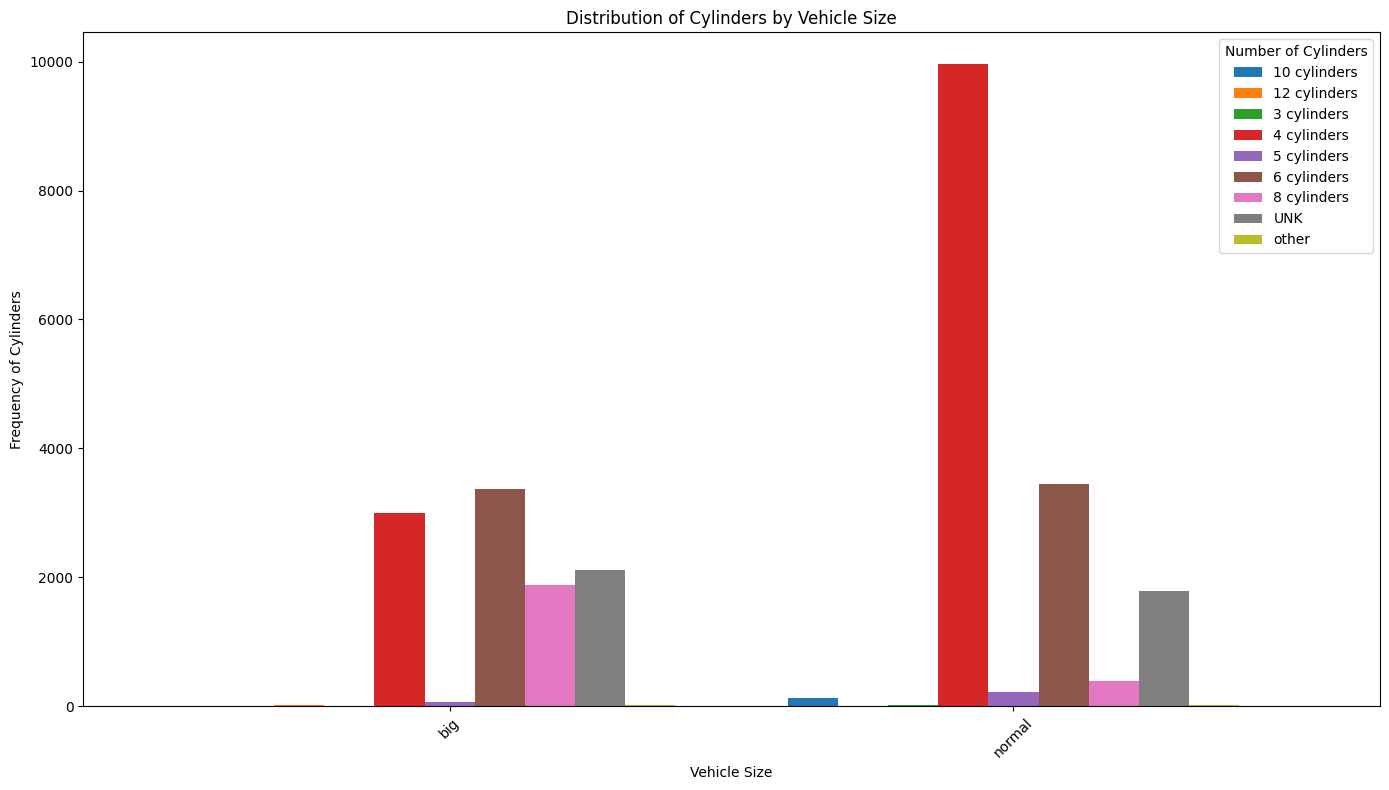

cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
size                                                                           
big                   9            22            5         3005           62   
normal              128             0           25         9956          222   

cylinders  6 cylinders  8 cylinders   UNK  other  
size                                              
big               3364         1888  2111     24  
normal            3450          399  1785     25  


In [ ]:
vehicle_type = 'sedan'
visualize(data, vehicle_type)

Note that sedans with 3, 4, 5 and 10 cylinders tend to be normal-sized, while those with 8 and 12 cylinders tend to be big-sized. We notice that there is an equal distribution between big and normal when the cylinder type is "other" or "unk".

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['3 cylinders',  '4 cylinders',  '5 cylinders', '10 cylinders'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'
    dataset.loc[dataset['cylinders'].isin(['8 cylinders',  '12 cylinders'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

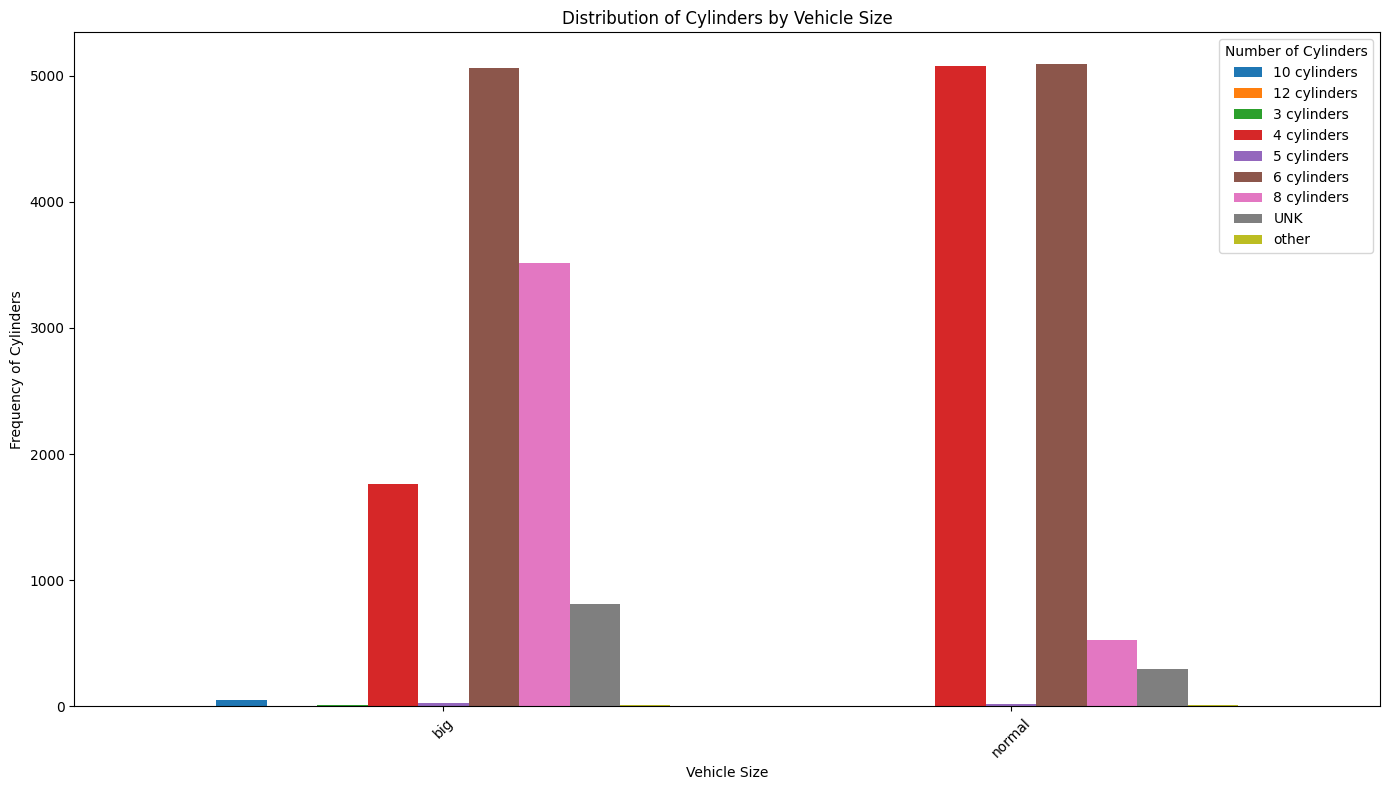

cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
size                                                                           
big                  54             1           10         1763           26   
normal                1             0            5         5074           22   

cylinders  6 cylinders  8 cylinders  UNK  other  
size                                             
big               5058         3515  808     11  
normal            5089          527  296     10  


In [ ]:
vehicle_type = 'SUV'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
      dataset.loc[dataset['cylinders'].isin(['4 cylinders'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'
      dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '12 cylinders',  '8 cylinders', 'UNK'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

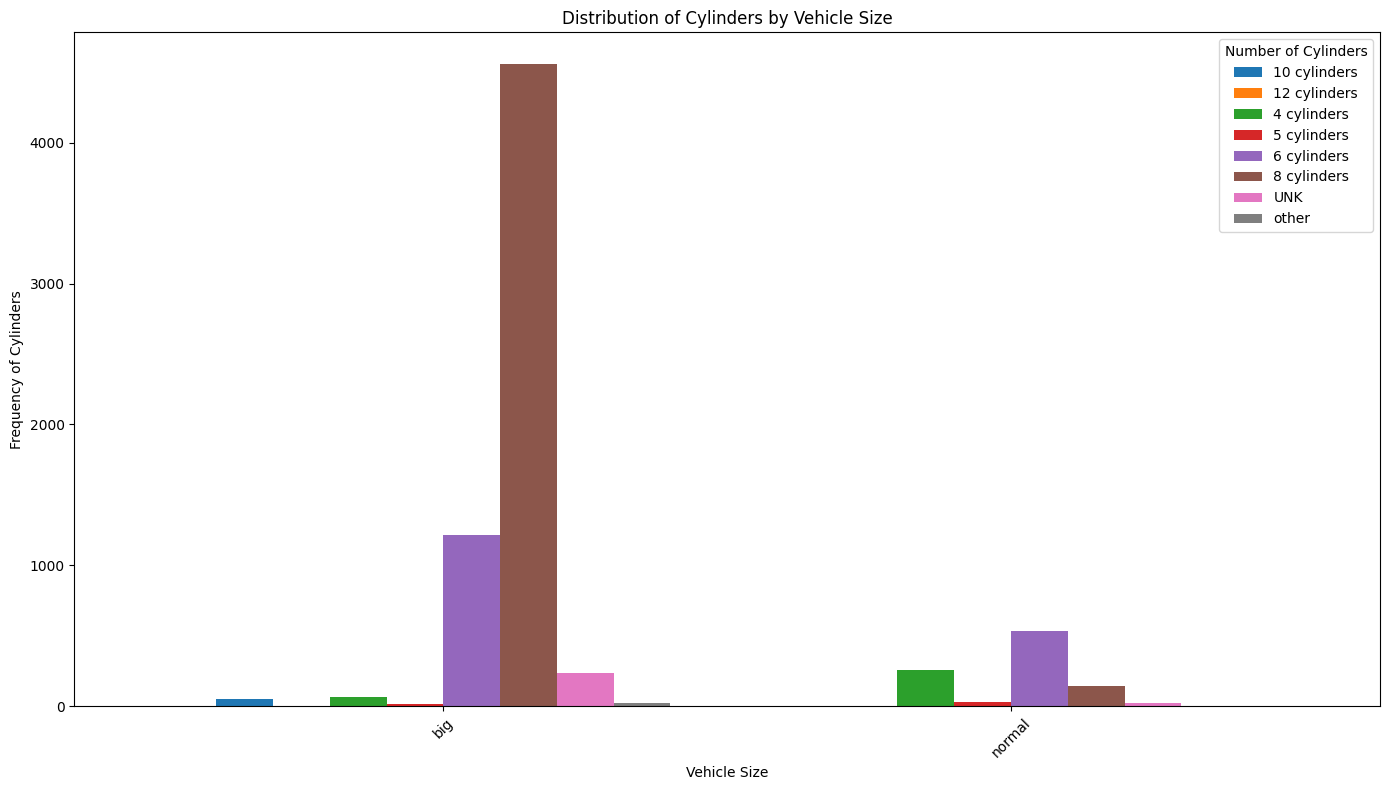

cylinders  10 cylinders  12 cylinders  4 cylinders  5 cylinders  6 cylinders  \
size                                                                           
big                  50             1           66           17         1216   
normal                2             0          255           30          537   

cylinders  8 cylinders  UNK  other  
size                                
big               4555  239     22  
normal             144   26      3  


In [ ]:
vehicle_type = 'pickup'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
      dataset.loc[dataset['cylinders'].isin(['4 cylinders'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'
      dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '12 cylinders', '6 cylinders', '8 cylinders', 'UNK', 'other'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

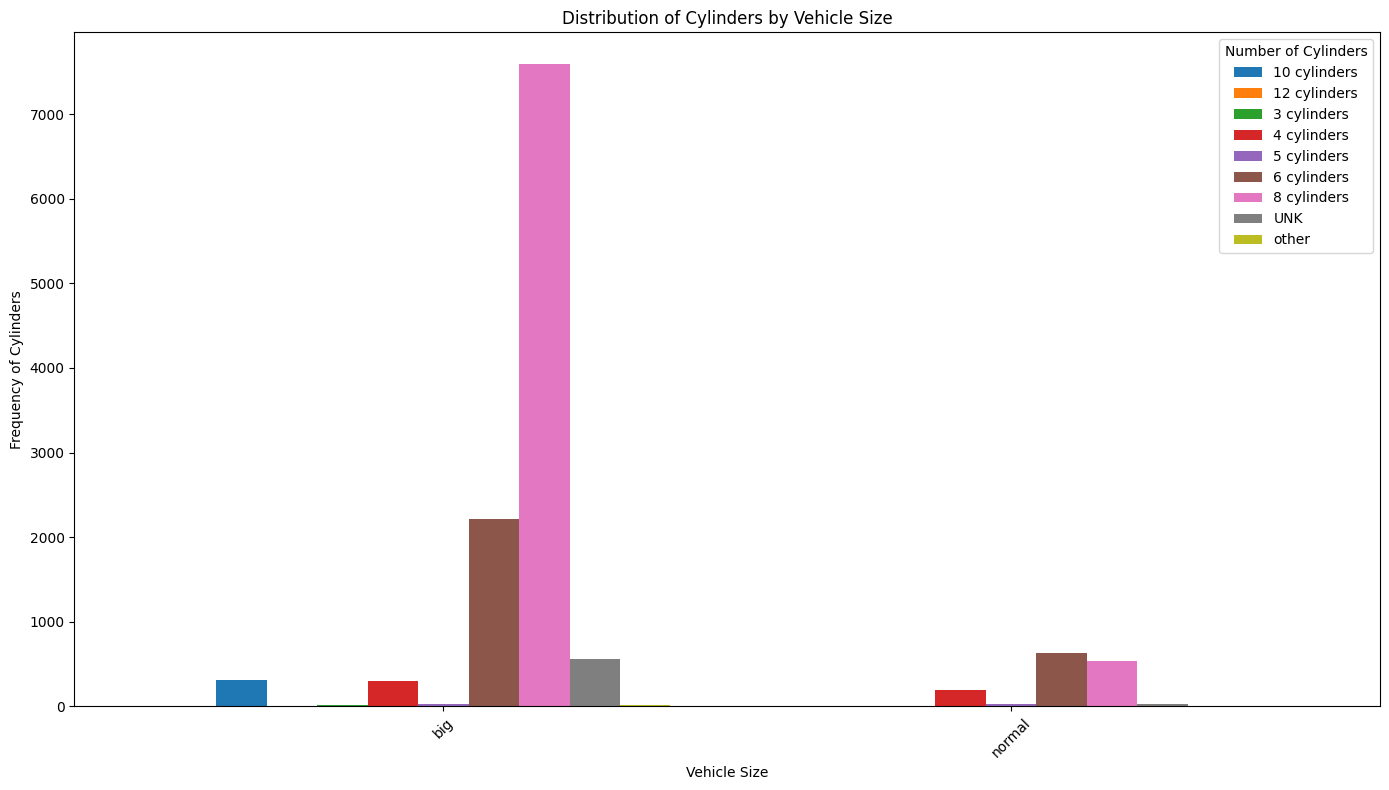

cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
size                                                                           
big                 317             1           17          302           23   
normal                1             0            3          188           26   

cylinders  6 cylinders  8 cylinders  UNK  other  
size                                             
big               2213         7588  560     19  
normal             628          538   25      2  


In [ ]:
vehicle_type = 'truck'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
      dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '12 cylinders', '3 cylinders', '6 cylinders', '8 cylinders', 'UNK', 'other'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

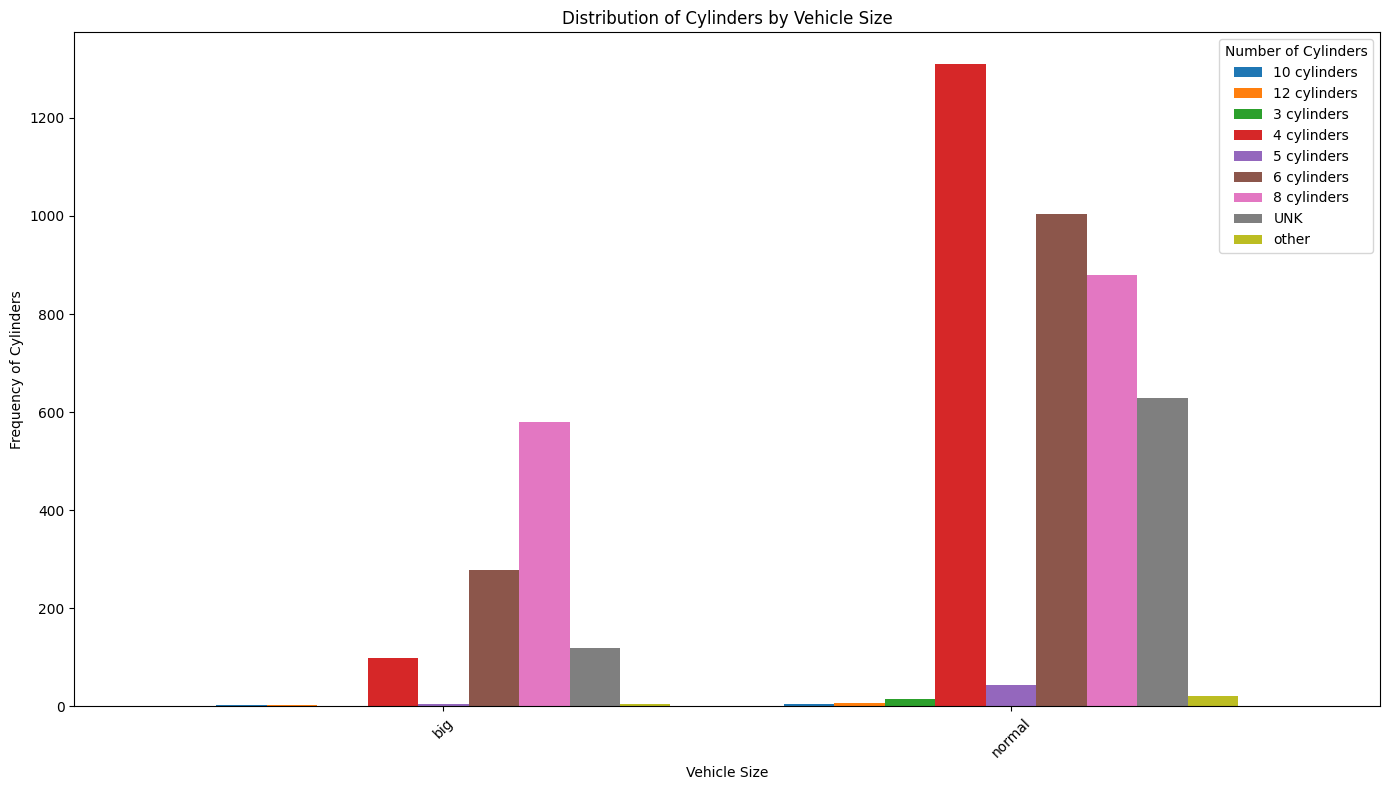

cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
size                                                                           
big                   3             3            0           98            5   
normal                4             6           16         1309           43   

cylinders  6 cylinders  8 cylinders  UNK  other  
size                                             
big                279          580  119      5  
normal            1003          880  628     21  


In [ ]:
vehicle_type = 'coupe'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
      dataset.loc[dataset['cylinders'].isin(['3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', 'UNK', 'other'])\
              & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'

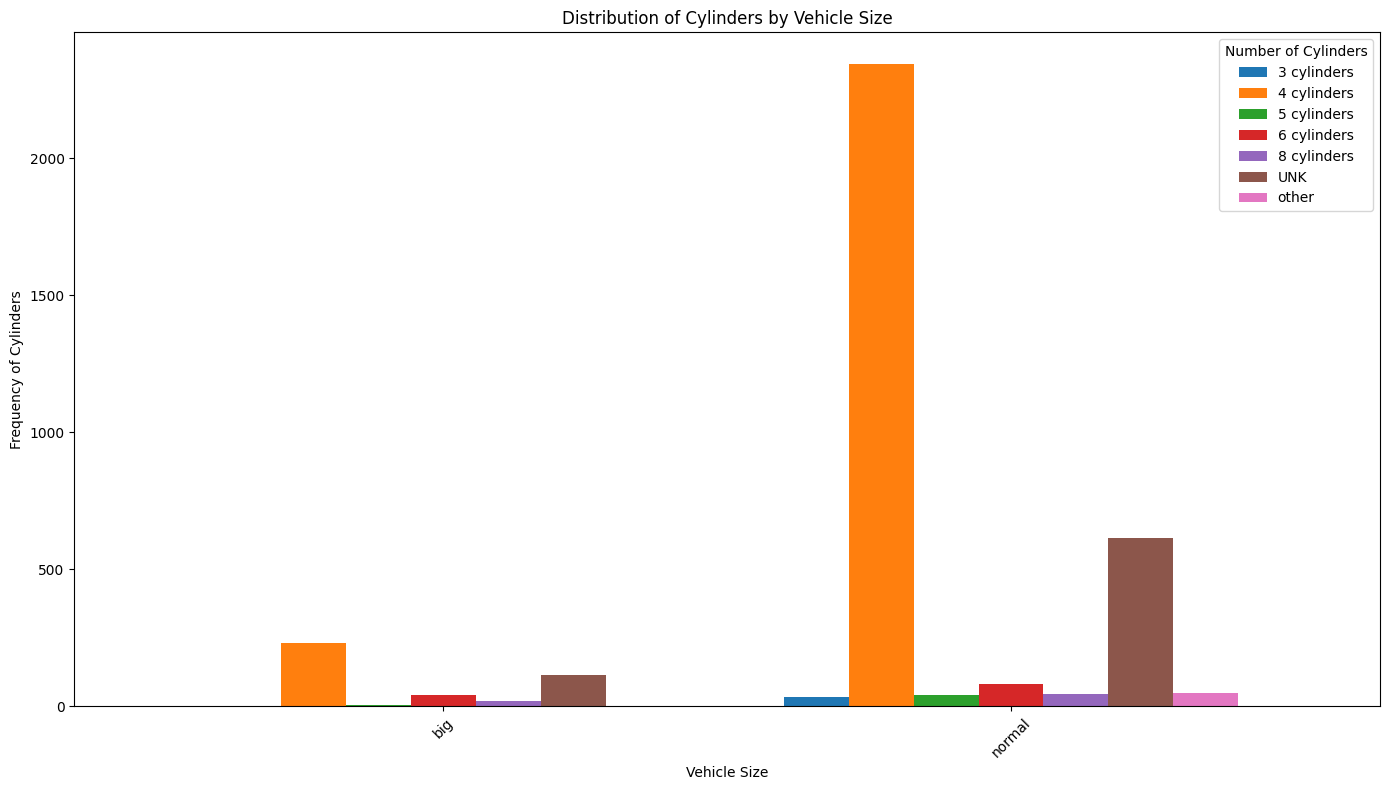

cylinders  3 cylinders  4 cylinders  5 cylinders  6 cylinders  8 cylinders  \
size                                                                         
big                  2          231            4           41           21   
normal              35         2343           42           80           45   

cylinders  UNK  other  
size                   
big        113      3  
normal     614     48  


In [ ]:
vehicle_type = 'hatchback'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['3 cylinders',  '4 cylinders', '5 cylinders', 'UNK', 'other'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'
    dataset.loc[dataset['cylinders'].isin(['10 cylinders'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

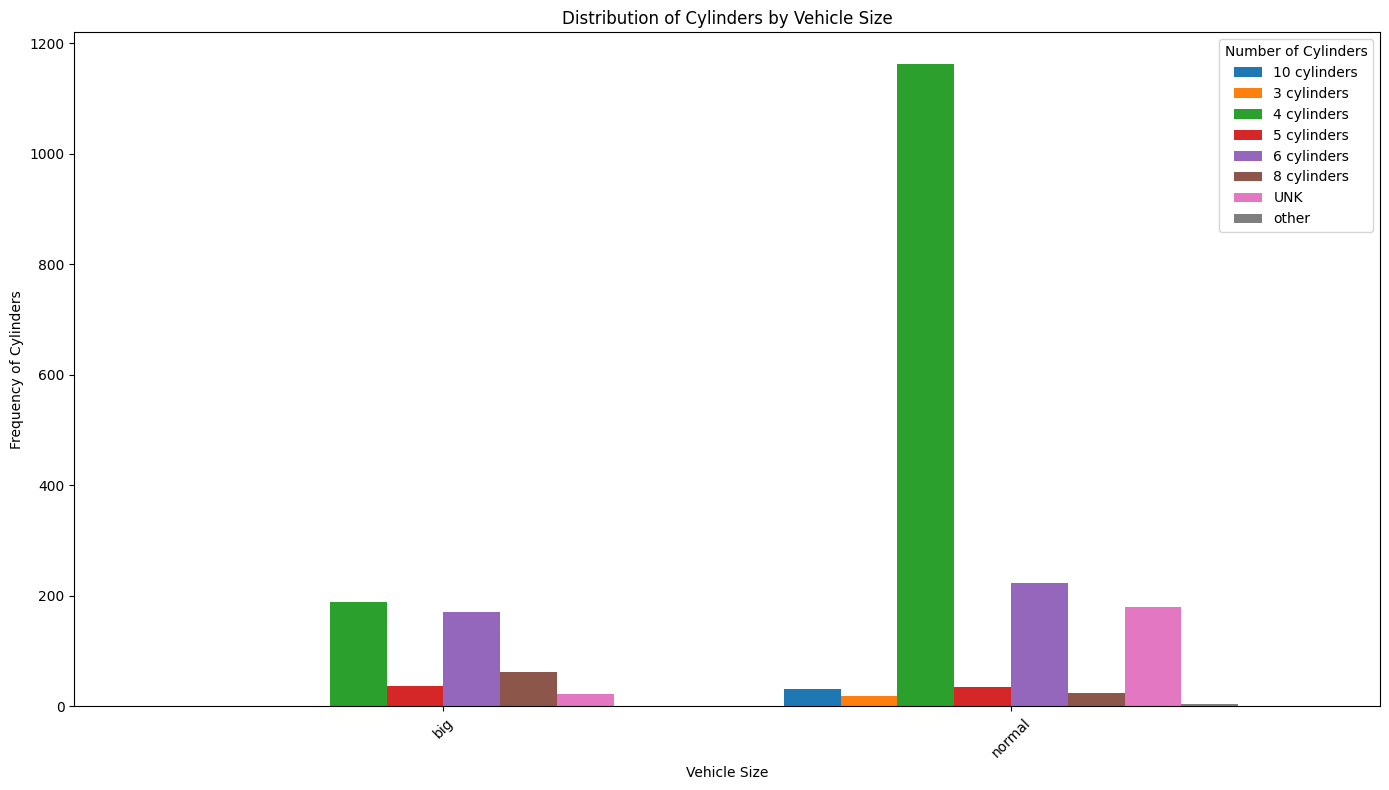

cylinders  10 cylinders  3 cylinders  4 cylinders  5 cylinders  6 cylinders  \
size                                                                          
big                   1            0          189           36          170   
normal               31           18         1162           35          223   

cylinders  8 cylinders  UNK  other  
size                                
big                 62   23      0  
normal              25  180      4  


In [ ]:
vehicle_type = 'wagon'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '3 cylinders', '4 cylinders',  'UNK', 'other'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'
    dataset.loc[dataset['cylinders'].isin(['8 cylieditnders'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

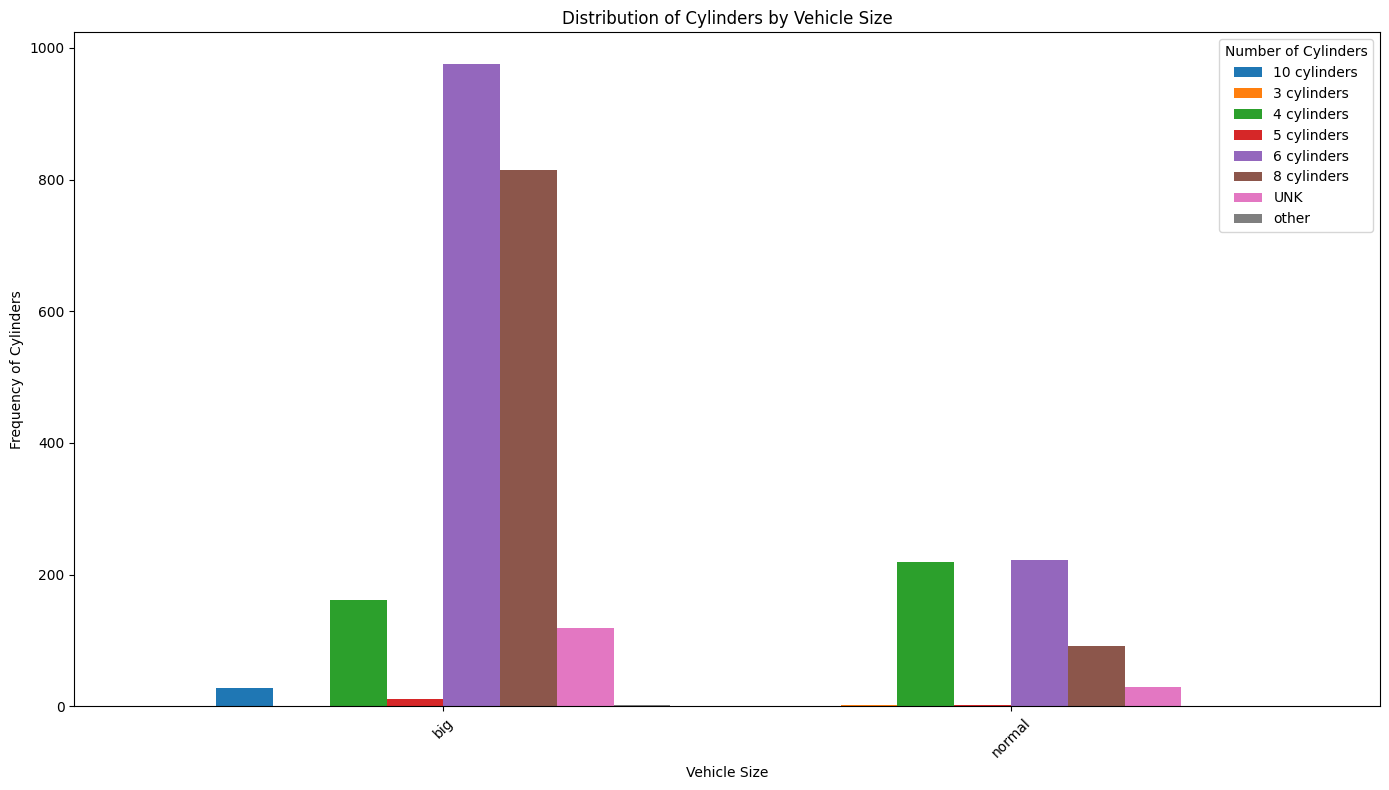

cylinders  10 cylinders  3 cylinders  4 cylinders  5 cylinders  6 cylinders  \
size                                                                          
big                  28            1          162           11          975   
normal                0            2          219            2          223   

cylinders  8 cylinders  UNK  other  
size                                
big                815  119      2  
normal              92   30      0  


In [ ]:
vehicle_type = 'van'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '5 cylinders', '6 cylinders', '8 cylinders', 'UNK', 'other'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

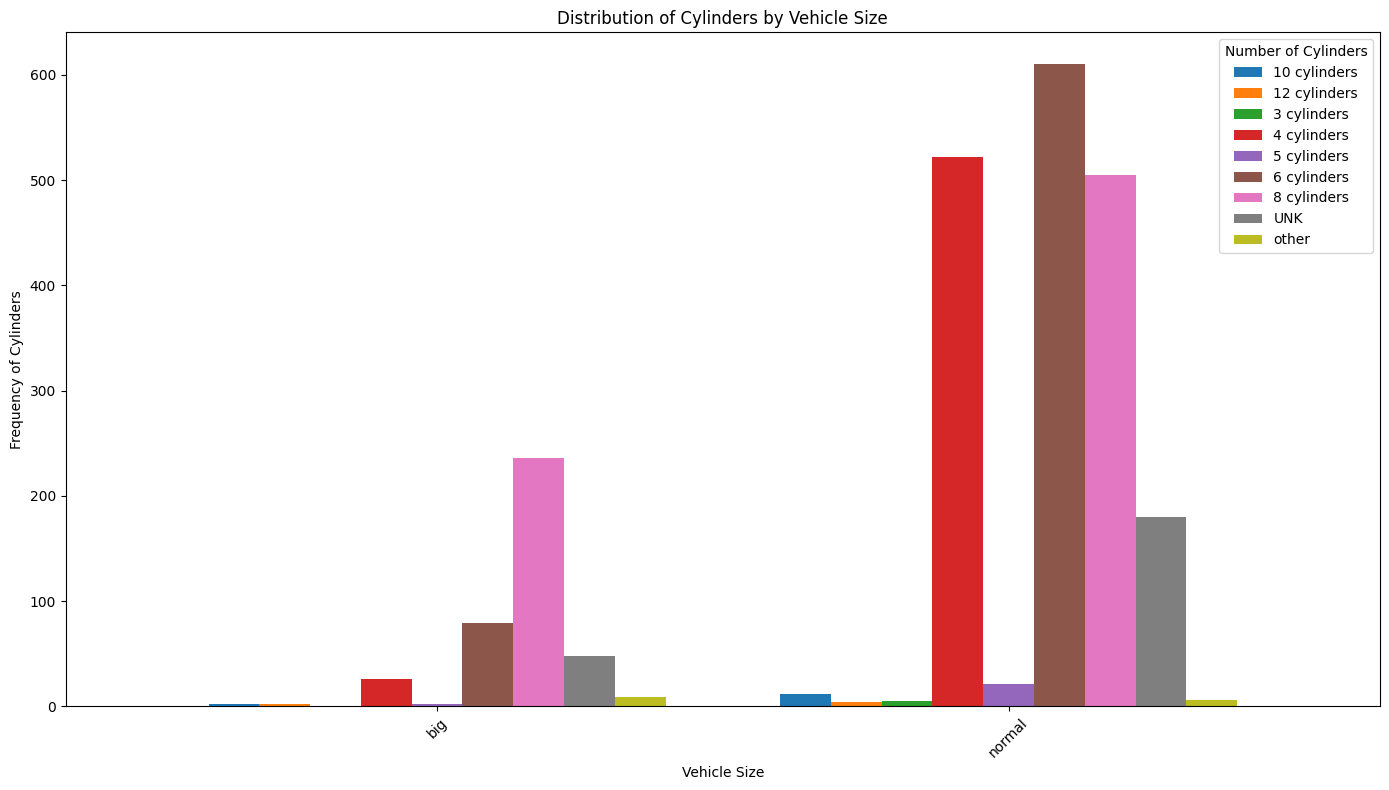

cylinders  10 cylinders  12 cylinders  3 cylinders  4 cylinders  5 cylinders  \
size                                                                           
big                   2             2            0           26            2   
normal               12             4            5          522           21   

cylinders  6 cylinders  8 cylinders  UNK  other  
size                                             
big                 79          236   48      9  
normal             610          505  180      6  


In [ ]:
vehicle_type = 'convertible'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['10 cylinders',  '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders',\
                                    '6 cylinders', '8 cylinders', 'UNK'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'

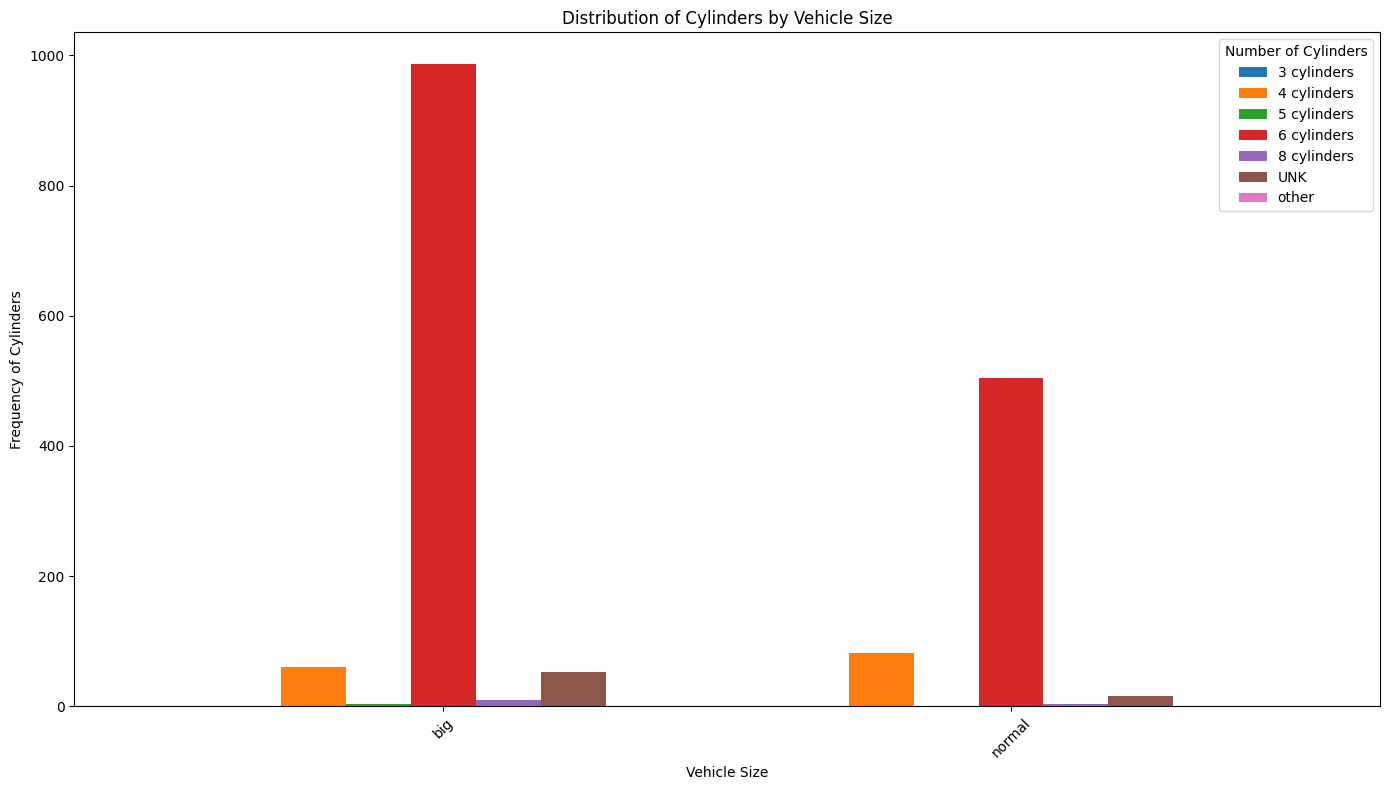

cylinders  3 cylinders  4 cylinders  5 cylinders  6 cylinders  8 cylinders  \
size                                                                         
big                  1           60            4          986            9   
normal               1           82            0          505            3   

cylinders  UNK  other  
size                   
big         52      1  
normal      16      0  


In [ ]:
vehicle_type = 'mini-van'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['5 cylinders',  '6 cylinders', '8 cylinders', 'UNK', 'other'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

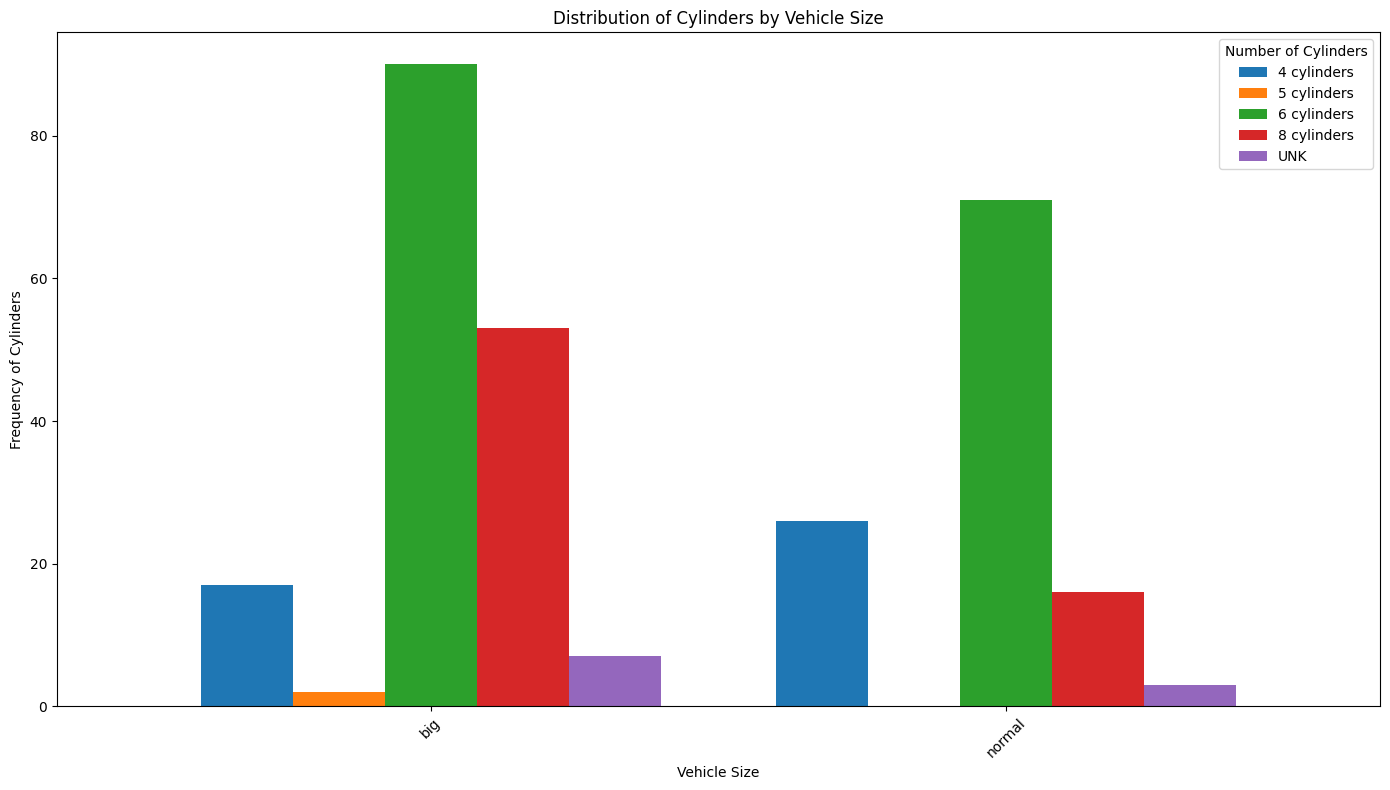

cylinders  4 cylinders  5 cylinders  6 cylinders  8 cylinders  UNK
size                                                              
big                 17            2           90           53    7
normal              26            0           71           16    3


In [ ]:
vehicle_type = 'offroad'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['5 cylinders', '8 cylinders', 'UNK'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

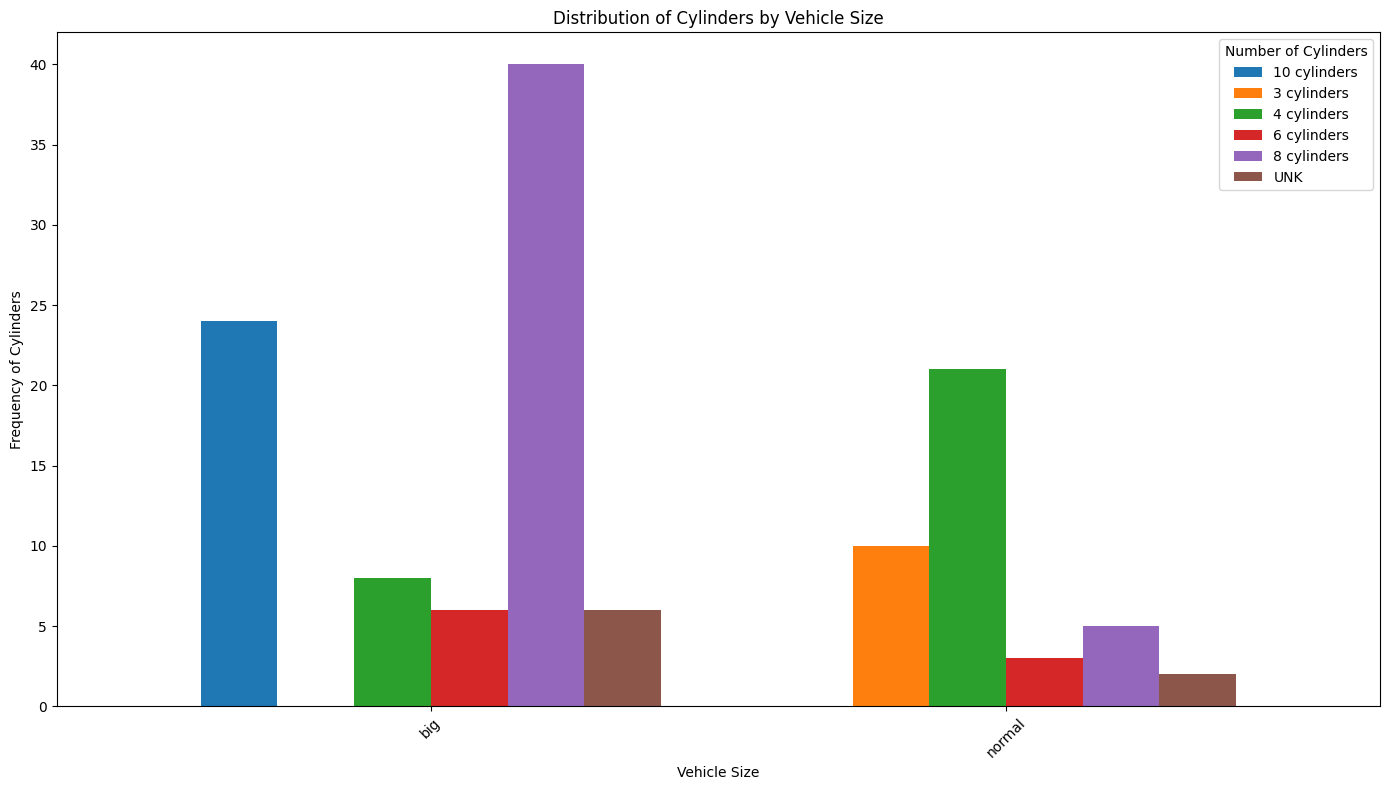

cylinders  10 cylinders  3 cylinders  4 cylinders  6 cylinders  8 cylinders  \
size                                                                          
big                  24            0            8            6           40   
normal                0           10           21            3            5   

cylinders  UNK  
size            
big          6  
normal       2  


In [ ]:
vehicle_type = 'bus'
visualize(data, vehicle_type)

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['cylinders'].isin(['3 cylinders'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'normal'

    dataset.loc[dataset['cylinders'].isin(['10 cylinders', '4 cylinders', '8 cylinders', 'UNK'])\
            & dataset['size'].isnull() & (dataset['type'] == vehicle_type), 'size'] = 'big'

In [ ]:
# For the remainder we define it as unknown.
for dataset in datasets:
    dataset['size'].fillna(value='UNK', inplace=True)

In [ ]:
# check out missing values again
data.isna().sum()

manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

In [ ]:
val_data.isna().sum()

manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

In [ ]:
test_data.isna().sum()

manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
dtype: int64

### Visualize data and understand relationships between features

These graphs are of invaluable use to the model. Through these diagrams we can understand the relationships between variables and benefit from them in the feature engineering phase.


First of all let's build a function that tests **[Cramer's V](https://www.spss-tutorials.com/cramers-v-what-and-why/)**. Cramer's V is a statistic used to measure the strength of association between two categorical variables, offering a value between 0 (no association between the variables) and 1 (perfect association). This measure is based on the Pearson **[Chi-square](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)** statistic derived from a contingency table that represents the intersection of the two variables. Unlike the Chi-square test, which tells you if there's a statistically significant relationship between two categorical variables, Cramer's V quantifies the strength of that relationship.

As mentioned, Cramer's V test is a modification of the Chi-square, and the Chi-square measure alone is often used and the p-value is used to interpret the correlation, but with a very large dataset (like ours, which has about 300,000 examples), even minor deviations from expected frequencies can result in very high Chi-Square statistics and, consequently, extremely small p-values. The Chi-Square test can be very sensitive to sample size, and with large samples, you're more likely to reject the null hypothesis. In contrast Cramer's V is not influenced by the size of the contingency table or the sample size, making it a useful measure for comparing the strength of association across different pairs of variables.

In [ ]:
# Analyzing the association between 'type' and another feature
def cramers_v(col1, col2):
    """Calculate Cramer's V statistic.

    Args:
        col1, col2: columns that we want to analyze the association between them.
    """
    contingency_table = pd.crosstab(col1, col2)
    # Number of observations
    n = col1.shape[0]
    # Number of columns and rows in the contingency table
    k, r = contingency_table.shape
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    cramers_v_value = np.sqrt(chi2 / (n * (min(k, r) - 1)))
    print(f"Cramer's V = {cramers_v_value}")

For categorical variables like manufacturer, drive, condition, and transmission we can use **count plots** or **bar charts** to visualize the distribution of vehicle types within each category.
- Each bar in the plot represents the count of vehicles of each type.
- Different colors within each bar represent the distribution of the specified categorical variable within each vehicle type.
- By observing these plots, you can identify patterns and understand which categories are most common for each vehicle type.

[seaborn.countplot()](https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/) method is used to Show the counts of observations in each categorical bin using bars.

We will also build a function to plot a heatmap that shows the co-occurrence of two categorical variables.

In [ ]:
# Define a function to plot count plots for categorical variables
def plot_categorical_relationship(data, column, fx=12, fy=6):
    plt.figure(figsize=(fx, fy))
    sns.countplot(data=data, x='type', hue=column)
    plt.title(f'Distribution of Vehicle Types by {column}')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=column)
    plt.show()

# Define a function to plot heatmap of Vehicle Types by another feature
def plot_heatmap(data, column, inverse = False, fx=12, fy=8):
    if inverse:
        contingency_table = pd.crosstab(data[column], data['type'])
    else:
        contingency_table = pd.crosstab(data['type'], data[column])

    # Normalize the contingency table to get percentages
    # Normalize across rows
    contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

    plt.figure(figsize=(fx, fy))
    sns.heatmap(contingency_percentage, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('Heatmap of Vehicle Types by {} (Percentage)'.format(column))
    if inverse:
        plt.ylabel(column), plt.xlabel('Type')
    else:
        plt.xlabel(column), plt.ylabel('Type')
    plt.xticks(rotation=45)
    plt.show()

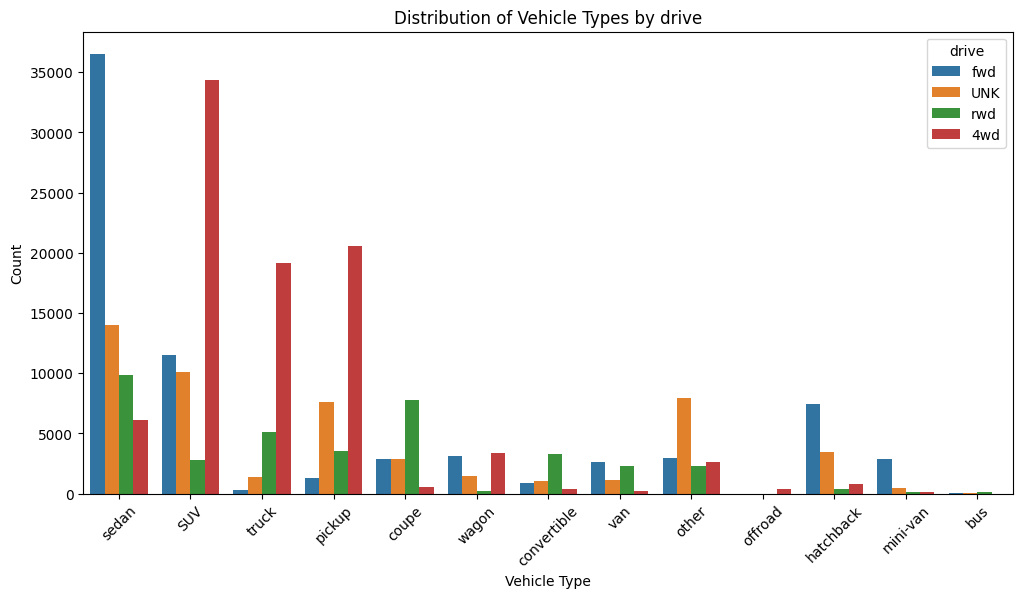

Cramer's V = 0.4251306355959709


In [ ]:
plot_categorical_relationship(data, 'drive')
cramers_v(data['type'], data['drive'])

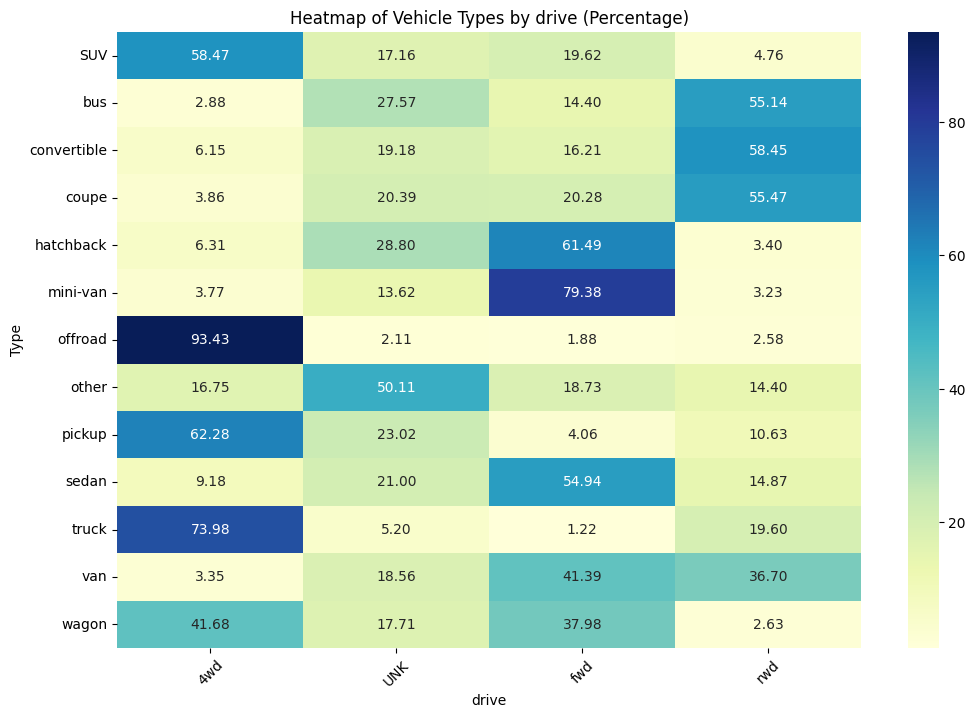

In [ ]:
plot_heatmap(data, 'drive')

**Generally, we note the following:**
* Most pickup, truck and SUV  are 4wd cars, and this makes sense.
* Most "other" vehicles are associated with UNK drive, which may indicate a special type of vehicle with a special kind of drive. Maybe they are all-wheel drive cars like the Tesla S5.
* Most of coupe and convertible vehicles are rwd.
* Most of sedan, hatchback and mini-van vehicles are fwd.
* Offroad cars are totaly almost 4wd.
* Van rarely to be 4wd.
* wagon rarely to be rwd.
* etc..

**Cramer's V = 0.42** suggests that the type of drive (e.g., 4WD, FWD, RWD) has a moderately strong relationship with the type of vehicle (e.g., sedan, SUV, truck).

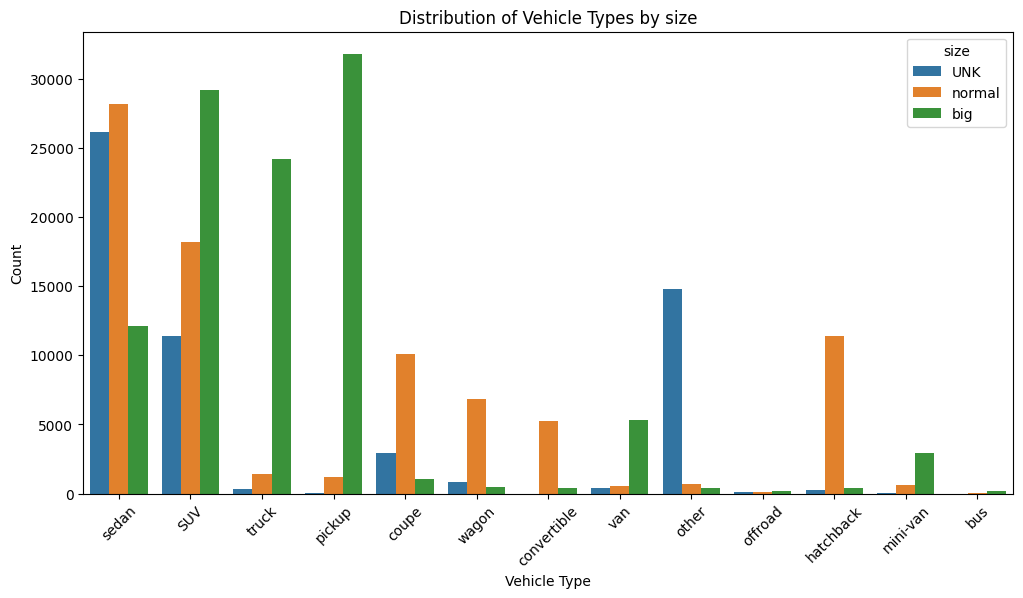

Cramer's V = 0.6043646538426704


In [ ]:
plot_categorical_relationship(data, 'size')
cramers_v(data['type'], data['size'])

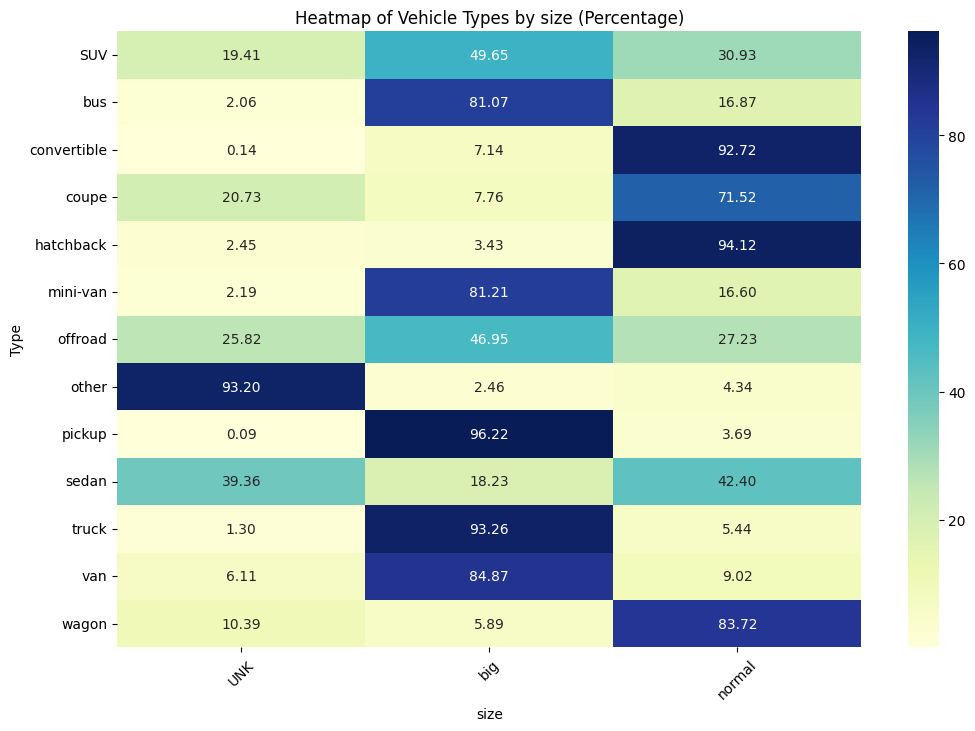

In [ ]:
plot_heatmap(data, 'size', inverse=False)

**We note the following:**
* Alomost all of pickup, van, mini-van and truck vechiles are big.
* When the vechiles are "other" they are "UNK", and that's interesting. That does suggest a potential connection that could be leveraged in our model. Recognizing the association between "other" types and "UNK" size, you can create a new feature that captures this relationship. For example, we could create a binary indicator variable that flags whether a vehicle is classified as "other" and has an "UNK" size. This new feature may provide valuable information to the model about instances where size information is missing or unknown, which could be relevant for classification.
* Coupe, hatchback, wagon and convertible are almost always normal-sized.
* etc..

**Cramer's V = 0.6** suggests that the size has a strong relationship with the type of vehicle (e.g., sedan, SUV, truck).

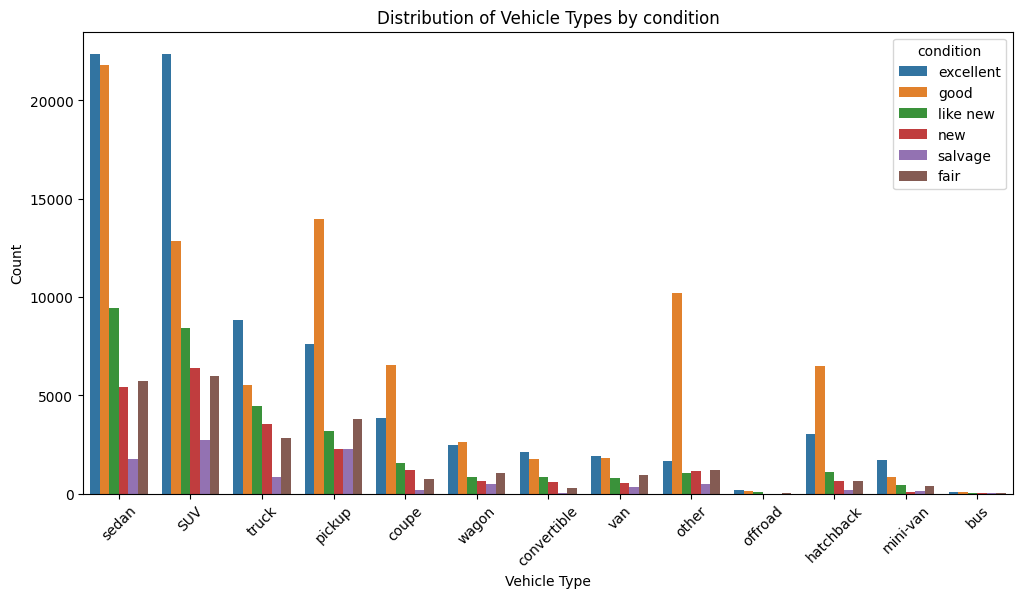

Cramer's V = 0.13190575025716247


In [ ]:
plot_categorical_relationship(data, 'condition')
cramers_v(data['type'], data['condition'])

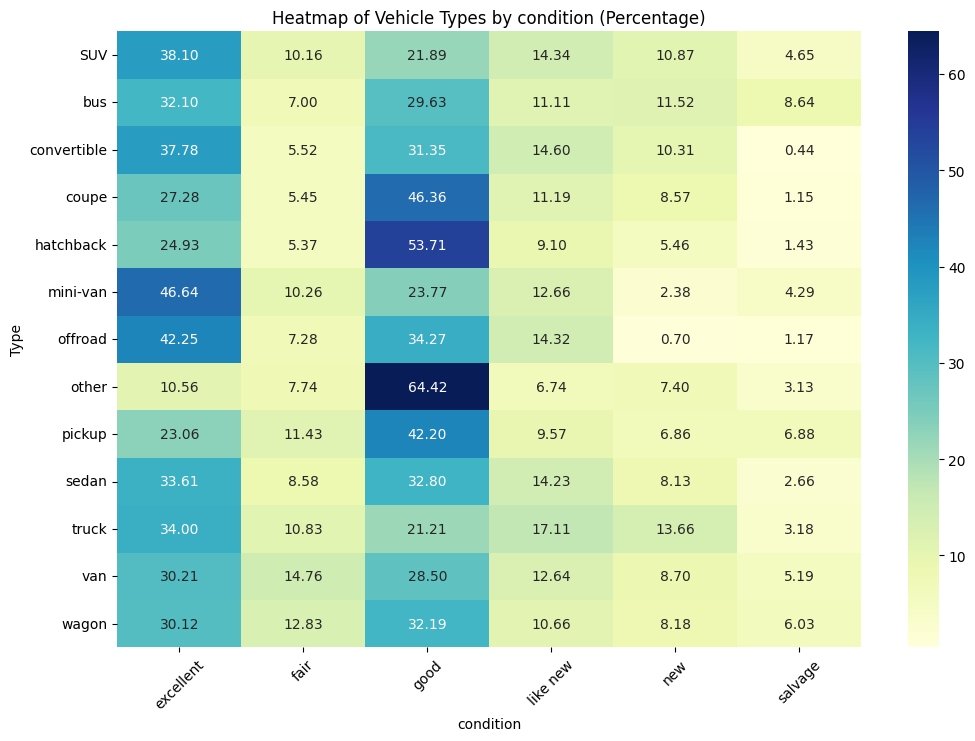

In [ ]:
plot_heatmap(data, 'condition')

**We note the following:**
* Nothing intriguing with this feature. We could drop it to reduce the complexity!

**Cramer's V = 0.13** suggests that the condition has a weak relationship.

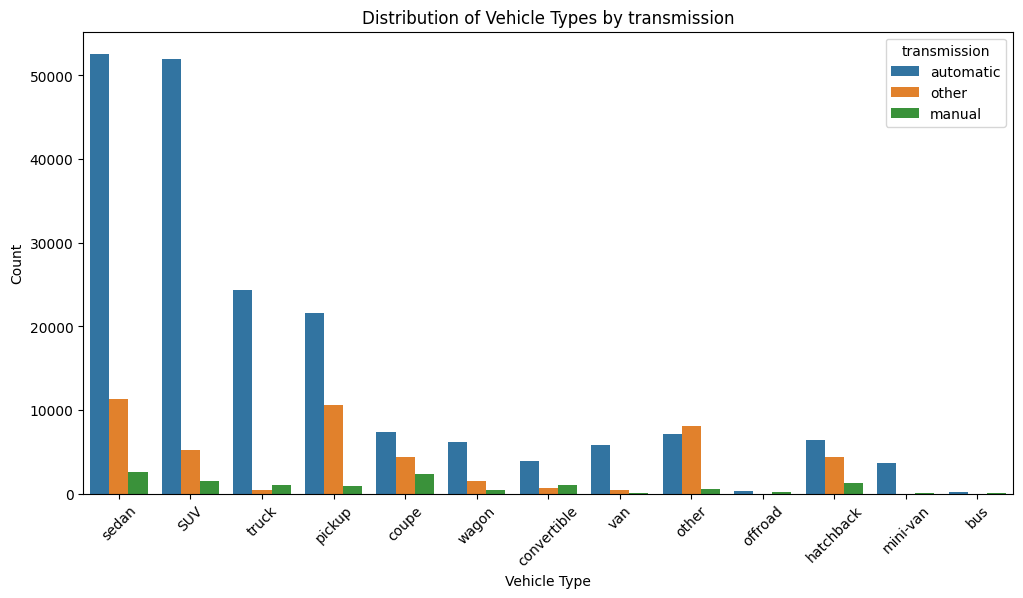

Cramer's V = 0.2835288791850176


In [ ]:
plot_categorical_relationship(data, 'transmission')
cramers_v(data['type'], data['transmission'])

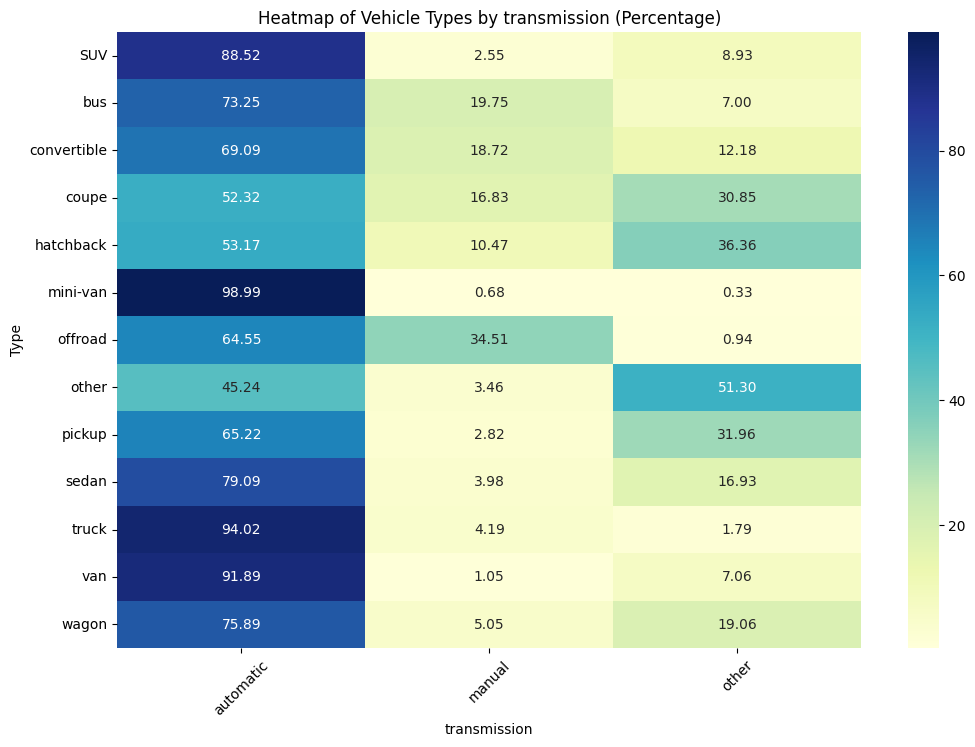

In [ ]:
plot_heatmap(data, 'transmission')

**We note the following:**
* We clearly notice the dominance of automatic transmission.

**Cramer's V = 0.28** suggests a low to moderate association. While the association is not very strong, Intuatively, the transmission type does have some relationship with the vehicle type.

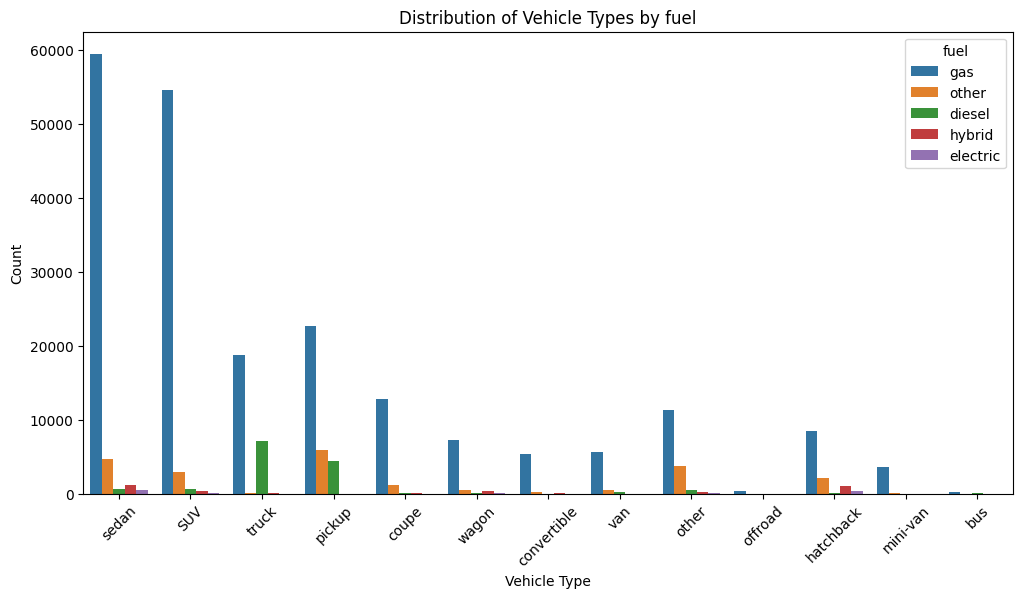

Cramer's V = 0.2370233609399908


In [ ]:
plot_categorical_relationship(data, 'fuel')
cramers_v(data['type'], data['fuel'])

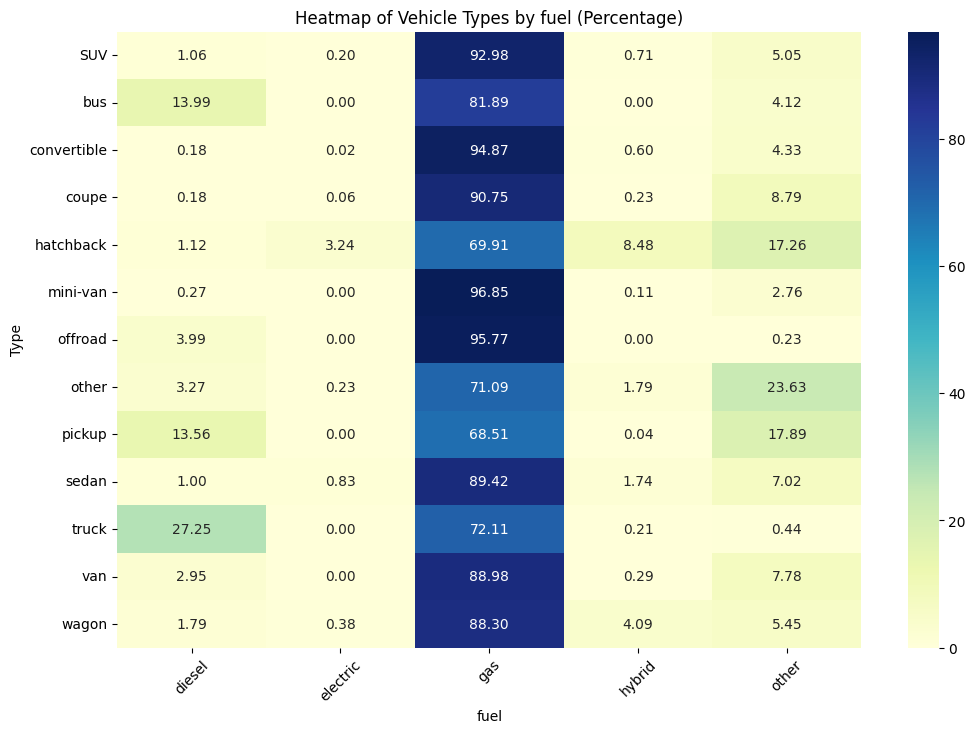

In [ ]:
plot_heatmap(data, 'fuel')

**We note the following:**
* We clearly notice the dominance of gas fuel. This reduces the entropy of information.
* We notice that almost all types of vehicles rely on gas only, and other types use multiple types of fuel, such as pickups.

**Cramer's V = 0.24** suggests a low association.

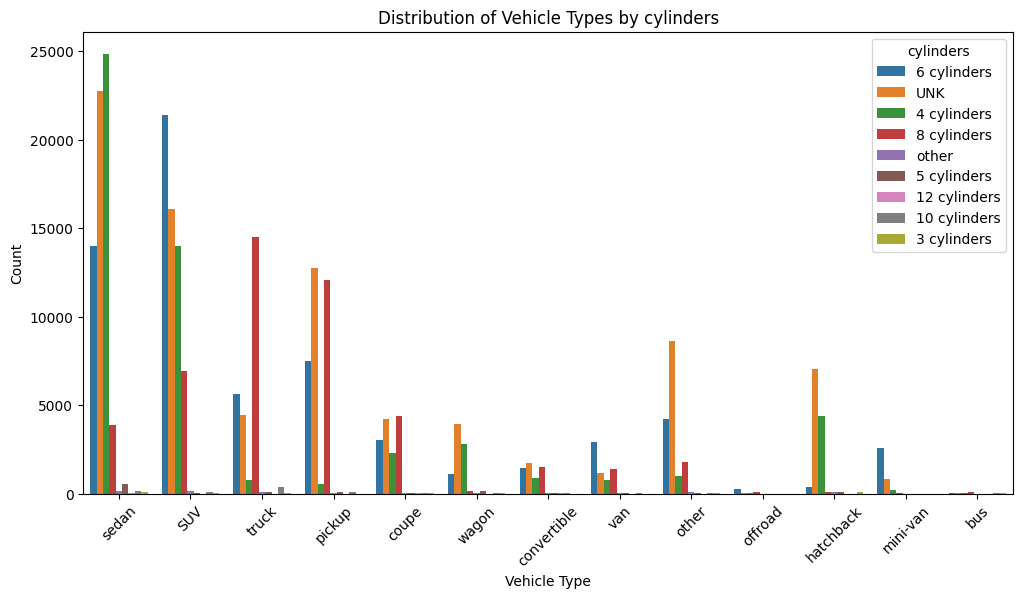

Cramer's V = 0.20679571501322855


In [ ]:
plot_categorical_relationship(data, 'cylinders')
cramers_v(data['type'], data['cylinders'])

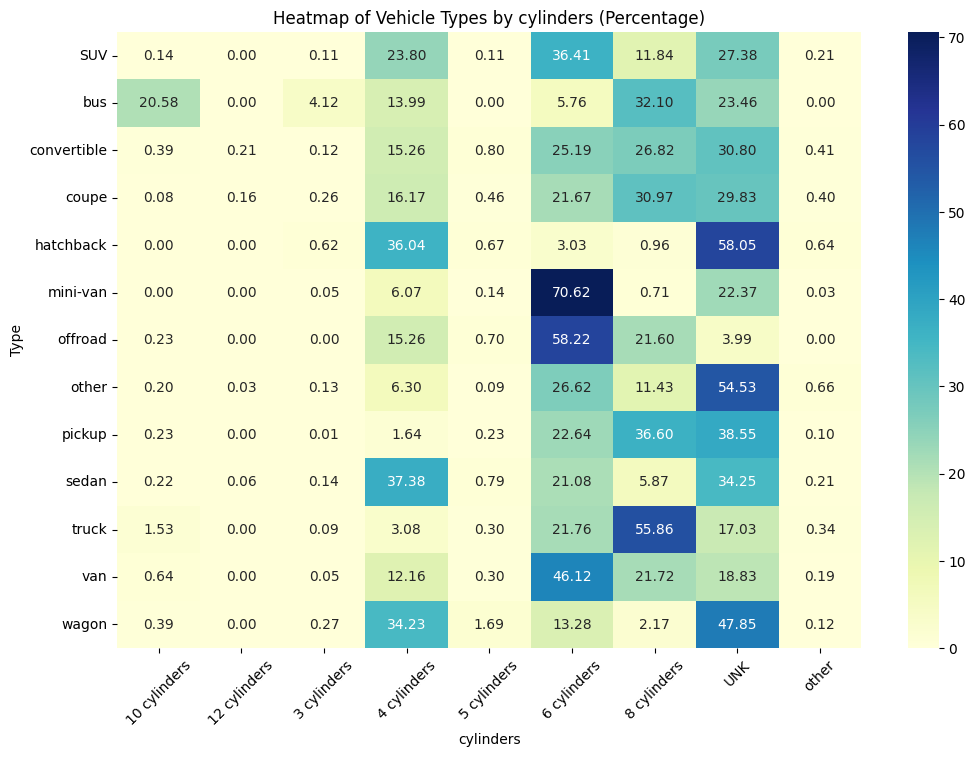

In [ ]:
plot_heatmap(data, 'cylinders')

**We note the following:**
* Obviously, missing values have an impact on the importance of this column and its correlation with the values of the Type column. Notice how they are distributed across all vehicle types.

**Cramer's V = 0.2** suggests a low association.

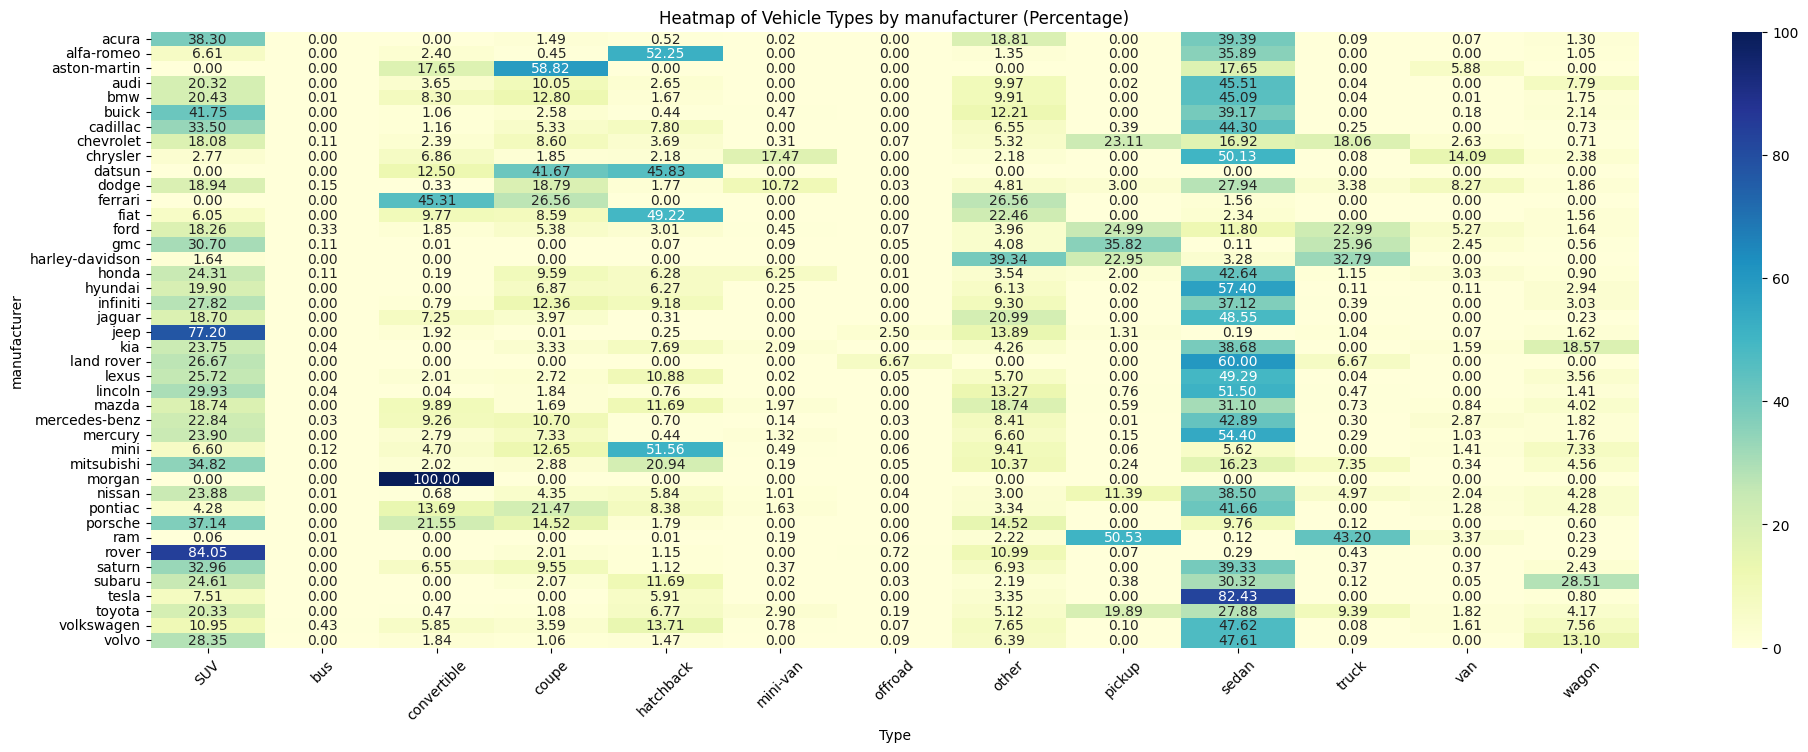

Cramer's V = 0.2670421924646859


In [ ]:
plot_heatmap(data, 'manufacturer', inverse= True, fx= 24, fy=8)
cramers_v(data['type'], data['manufacturer'])

**We note the following:**
* We note that most of manufacturers specialized in specific types of vehicles. For example, Morgan specializes in making convertible vehicles only.



**Cramer's V = 0.27** suggests a low to moderate association.

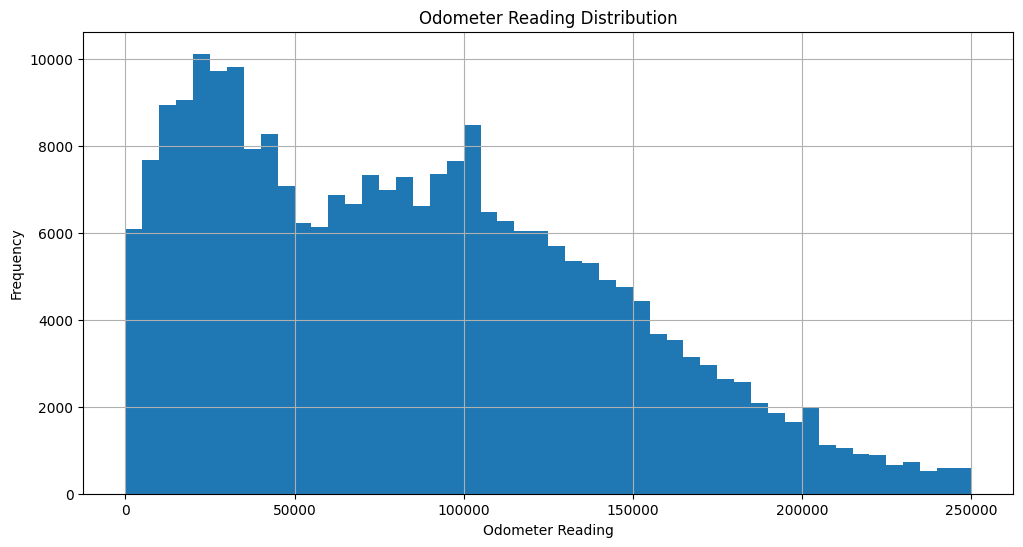

In [ ]:
# Plot a histogram to visualize the distribution
plt.figure(figsize=(12, 6))
data['odometer'].hist(bins=50)
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')
plt.title('Odometer Reading Distribution')
plt.show()

A [box plot](https://www.simplypsychology.org/boxplots.html), also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


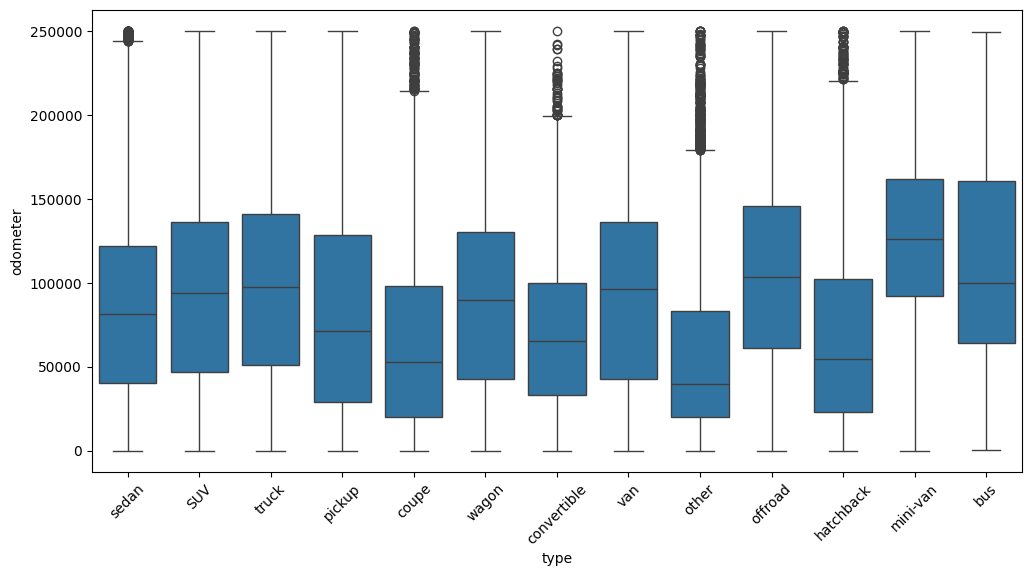

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='odometer', data=data)
plt.xticks(rotation=45)
plt.show()

* Some types of vehicles (such as bus and mini-van) are higher than others. This reflects the purpose of these vehicles, as they actually cover really long distances. On the other hand, some types of vehicles tend to be inferior to others (we see this in the "other" type which actually refers to specialized types of cars such as golf cars, Tesla cars, or luxury cars). We can see that the upper quartile for the "other" type is the lower quartile for the "Mini-Van" type.
* The longer the box, the more dispersed the data. Clearly, our data are sparse.
* We note that the means of many boxes are very similar, this indicates that some types of vechiles have similar distributions. For example, sedans, trucks, bus, wagon, van and SUVs.
* When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot. Given that along side with the assumbtion that "Other" category may encompass a wide variety of vehicle types, including those typically used for long distances, it's entirely plausible and expected to encounter higher odometer readings within this group. Therefore, It  might not necessarily indicate anomalies or errors but rather a characteristic feature of this group. This diversity should be accounted for in any analytical model or data exploration.
* For the rest of the values that appear to be outliers in other boxes, it is better to keep them and capping them rather than remove them. This means setting all odometer readings above your determined thresholds to those thresholds. This method retains the data points while reducing the impact of extreme values.

In [ ]:
for dataset in datasets:
    dataset.loc[dataset['type'].isin(['other']) & (dataset['odometer'] > 225000), 'odometer'] = 225000
    dataset.loc[dataset['type'].isin(['sedan']) & (dataset['odometer'] > 230000), 'odometer'] = 230000
    dataset.loc[dataset['type'].isin(['convertible', 'hatchback', 'coupe']) & (dataset['odometer'] > 190000), 'odometer'] = 190000

## Feature engineering



> [Feature engineering](https://builtin.com/articles/feature-engineering) is often considered more art than science, requiring domain knowledge, creativity, and experimentation.

Feature engineering can significantly enhance the predictive power of a model by introducing new information or distilling existing information into a more useful form. Key Aspects of Feature Engineering Include: Creating New Features-Transformation of Features-Selection of Important Features-Encoding Categorical Variables-Interaction Features


In [ ]:
print(data.shape, val_data.shape, test_data.shape)

(250699, 9) (27972, 9) (31004, 9)


In [ ]:
# Temporarily concatenate the training and test datasets (For consistency)
combined_data = pd.concat(datasets, sort=False).reset_index(drop=True)

First we will simplify `odometer`; we will create odometer group based on odometer bands. For example, If we think about segmentation based on usage, under 20,000 miles might be considered "like new," 20,000 to 50,000 miles as "lightly used," 50,000 to 100,000 miles as "used," and over 100,000 miles as "high mileage." These thresholds are illustrative; actual bands should be adjusted based on your data and objectives.

In [ ]:
combined_data.loc[(combined_data['odometer']<=20000),'odometerbin'] = 1
combined_data.loc[(combined_data['odometer']>=20000) & (combined_data['odometer']<50000),'odometerbin'] = 2
combined_data.loc[(combined_data['odometer']>=50000) & (combined_data['odometer']<100000),'odometerbin'] = 3
combined_data.loc[(combined_data['odometer']>=100000) & (combined_data['odometer']<150000),'odometerbin'] = 4
combined_data.loc[(combined_data['odometer']>=150000) & (combined_data['odometer']<200000),'odometerbin'] = 5
combined_data.loc[(combined_data['odometer']>=200000),'odometerbin'] = 6

combined_data['odometerbin'] = combined_data['odometerbin'].astype(int)
combined_data.drop(['odometer'], axis=1, inplace=True)

It is a form of discretization of a continuous variable. While this can help in simplifying the model, there is a risk of losing information. The effectiveness of this approach depends on how well the binning process preserves the meaningful variance in the odometer readings relative to the vehicle type.

As we pointed out before in EDA section, there are a lot of features we can add. Those features could be powerful.

In [ ]:
##########################################################################################
''' (type & manufacturer) Create new obvious features according to insights we get from EDA. '''
##########################################################################################

# Add a new column 'IsConvertibleTypeAndMorganManuf'.
combined_data['IsConvertibleTypeAndMorganManuf'] = ((combined_data['type'] == 'convertible') & (combined_data['manufacturer'] == 'Morgan')).astype(int)

# Add a new column 'IsSedanTypeAndTeslaManuf'.
combined_data['IsSedanTypeAndTeslaManuf'] = ((combined_data['type'] == 'sedan') & (combined_data['manufacturer'] == 'tesla')).astype(int)

# Add a new column 'IsSUVTypeAndRoverManuf'.
combined_data['IsSUVTypeAndRoverManuf'] = ((combined_data['type'] == 'SUV') & (combined_data['manufacturer'] == 'rover')).astype(int)

# Add a new column 'IsSUVTypeAndJeepManuf'.
combined_data['IsSUVTypeAndJeepManuf'] = ((combined_data['type'] == 'SUV') & (combined_data['manufacturer'] == 'jeep')).astype(int)

# Add a new column 'IsOffroadTypeAndJeepManuf'.
combined_data['IsOffroadTypeAndJeepManuf'] = ((combined_data['type'] == 'offroad') & (combined_data['manufacturer'] == 'jeep')).astype(int)

# Add a new column 'IsOffroadTypeAndJeepManuf'.
combined_data['IsBusTypeAndFordManuf'] = ((combined_data['type'] == 'bus') & (combined_data['manufacturer'] == 'ford')).astype(int)

##########################################################################################
''' (type & drive) Create new obvious features according to insights we get from EDA. '''
##########################################################################################

# Add a new column 'IsSUVTypeAnd4wdDrive' to the combined_dataFrame
combined_data['IsSUVTypeAnd4wdDrive'] = ((combined_data['type'] == 'suv') & (combined_data['drive'] == '4wd')).astype(int)

# Add a new column 'IsBusTypeAndRwdDrive' to the combined_dataFrame
combined_data['IsBusTypeAndRwdDrive'] = ((combined_data['type'] == 'bus') & (combined_data['drive'] == 'rwd')).astype(int)

# Add a new column 'IsConvertibleTypeAndRwdDrive' to the combined_dataFrame
combined_data['IsConvertibleTypeAndRwdDrive'] = ((combined_data['type'] == 'convertible') & (combined_data['drive'] == 'rwd')).astype(int)

# Add a new column 'IsCoupeTypeAndRwdDrive' to the combined_dataFrame
combined_data['IsCoupeTypeAndRwdDrive'] = ((combined_data['type'] == 'coupe') & (combined_data['drive'] == 'rwd')).astype(int)

# Add a new column 'IsHatchbackTypeAndFwdDrive' to the combined_dataFrame
combined_data['IsHatchbackTypeAndFwdDrive'] = ((combined_data['type'] == 'hatchback') & (combined_data['drive'] == 'fwd')).astype(int)

# Add a new column 'IsMini_vanTypeAndFwdDrive' to the combined_dataFrame
combined_data['IsMini_vanTypeAndFwdDrive'] = ((combined_data['type'] == 'mini-van') & (combined_data['drive'] == 'fwd')).astype(int)

# Add a new column 'IsOffroadTypeAnd4wdDrive' to the combined_dataFrame
combined_data['IsOffroadTypeAnd4wdDrive'] = ((combined_data['type'] == 'offroad') & (combined_data['drive'] == '4wd')).astype(int)

# Add a new column 'IsOtherTypeAndUNKDrive' to the combined_dataFrame
combined_data['IsOtherTypeAndUNKDrive'] = ((combined_data['type'] == 'other') & (combined_data['drive'] == 'UNK')).astype(int)

# Add a new column 'IsPickupTypeAnd4wdDrive' to the combined_dataFrame
combined_data['IsPickupTypeAnd4wdDrive'] = ((combined_data['type'] == 'pickup') & (combined_data['drive'] == '4wd')).astype(int)

# Add a new column 'IsSedanTypeAndFwdDrive' to the combined_dataFrame
combined_data['IsSedanTypeAndFwdDrive'] = ((combined_data['type'] == 'sedan') & (combined_data['drive'] == 'fwd')).astype(int)

# Add a new column 'IsTruckTypeAnd4wdDrive' to the combined_dataFrame
combined_data['IsOffroadTypeAnd4wdDrive'] = ((combined_data['type'] == 'truck') & (combined_data['drive'] == '4wd')).astype(int)

##########################################################################################
''' (type & size) Create new obvious features according to insights we get from EDA. '''
##########################################################################################

# Add a new column 'IsWagonTypeAndNormalSize' to the combined_dataFrame
combined_data['IsWagonTypeAndNormalSize'] = ((combined_data['type'] == 'wagon') & (combined_data['size'] == 'normal')).astype(int)

# Add a new column 'IsVanTypeAndBigSize' to the combined_dataFrame
combined_data['IsVanTypeAndBigSize'] = ((combined_data['type'] == 'van') & (combined_data['size'] == 'big')).astype(int)

# Add a new column 'IsTruckTypeAndBigSize' to the combined_dataFrame
combined_data['IsTruckTypeAndBigSize'] = ((combined_data['type'] == 'truck') & (combined_data['size'] == 'big')).astype(int)

# Add a new column 'IsPickupTypeAndBigSize' to the combined_dataFrame
combined_data['IsPickupTypeAndBigSize'] = ((combined_data['type'] == 'pickup') & (combined_data['size'] == 'big')).astype(int)

# Add a new column 'IsOtherTypeAndUnkSize' to the combined_dataFrame
combined_data['IsOtherTypeAndUnkSize'] = ((combined_data['type'] == 'other') & (combined_data['size'] == 'UNK')).astype(int)

# Add a new column 'IsMini_VanTypeAndBigSize' to the combined_dataFrame
combined_data['IsMini_VanTypeAndBigSize'] = ((combined_data['type'] == 'mini-van') & (combined_data['size'] == 'big')).astype(int)

# Add a new column 'IsHatchbackTypeAndNormalSize' to the combined_dataFrame
combined_data['IsHatchbackTypeAndNormalSize'] = ((combined_data['type'] == 'hatchback') & (combined_data['size'] == 'normal')).astype(int)

# Add a new column 'IsCoupeTypeAndNormalSize' to the combined_dataFrame
combined_data['IsCoupeTypeAndNormalSize'] = ((combined_data['type'] == 'coupe') & (combined_data['size'] == 'normal')).astype(int)

# Add a new column 'IsConvertibleTypeAndNormalSize' to the combined_dataFrame
combined_data['IsConvertibleTypeAndNormalSize'] = ((combined_data['type'] == 'convertible') & (combined_data['size'] == 'normal')).astype(int)

# Add a new column 'IsSUVTypeAndUNKSize' to the combined_dataFrame
combined_data['IsSUVTypeAndUNKSize'] = ((combined_data['type'] == 'SUV') & (combined_data['size'] == 'big')).astype(int)

# Add a new column 'IsBusTypeAndBigSize' to the combined_dataFrame
combined_data['IsBusTypeAndBigSize'] = ((combined_data['type'] == 'bus') & (combined_data['size'] == 'big')).astype(int)


##########################################################################################
''' (type & fuel) Create new obvious features according to insights we get from EDA. '''
##########################################################################################

# Add a new column 'IsTruckTypeAndDiselFuel' to the combined_dataFrame
combined_data['IsTruckTypeAndDiselFuel'] = ((combined_data['type'] == 'truck') & (combined_data['fuel'] == 'diesel')).astype(int)

# Add a new column 'IsHatchbackTypeAndElectricFuel' to the combined_dataFrame
combined_data['IsHatchbackTypeAndElectricFuel'] = ((combined_data['type'] == 'hatchback') & (combined_data['fuel'] == 'electric')).astype(int)

We've noticed that UNK cylinders are distributed on all types of vehicles (which is a fair number), and this can hurt performance. Applying mode imputation by vehicle type involves filling in the missing ('UNK') cylinder values with the most common cylinder count within each specific vehicle type. This method assumes that there's a meaningful relationship between vehicle type and the typical number of cylinders, which is a reasonable assumption for vehicles.

In [ ]:
# 1. Calculate the mode of cylinders for each vehicle type excluding 'UNK'
cylinder_mode_per_type = combined_data[combined_data['cylinders'] != 'UNK'].groupby('type')['cylinders'].agg(pd.Series.mode)

# 2. Impute missing ('UNK') values with the mode for its respective vehicle type
# This function will be applied to each row in the DataFrame
def impute_cylinders(row):
    # Check if the cylinder value is 'UNK'
    if row['cylinders'] == 'UNK':
        # If 'UNK', impute with the mode for its vehicle type
        mode_value = cylinder_mode_per_type.get(row['type'], 'UNK')  # Default to 'UNK' if type not found
        if isinstance(mode_value, pd.Series):  # If the mode is a Series, take the first value
            mode_value = mode_value.iloc[0]
        return mode_value
    else:
        # If not 'UNK', keep the original value
        return row['cylinders']

# Apply the function across all rows and replace the 'cylinders' column
combined_data['cylinders'] = combined_data.apply(impute_cylinders, axis=1)
combined_data['cylinders'] = combined_data.apply(impute_cylinders, axis=1)

Now, we need to convert all cat features to numeric:

In [ ]:
le = LabelEncoder()

combined_data['type'] = le.fit_transform(combined_data['type'])

# Saving the mapping from encoded labels to original categories
label_mapping = {index: label for index, label in enumerate(le.classes_)}

print(label_mapping)
# decoded_predictions = label_encoder.inverse_transform(predictions)

# Convert cylinders to a numeric (Although it can be converted to binary form, there is some kind of ordering.)
combined_data['cylinders'] = combined_data['cylinders'].replace({'UNK':0, 'other':1, '3 cylinders':2,'4 cylinders':3,'5 cylinders':4,'6 cylinders':5
                                               ,'8 cylinders':6,'10 cylinders':7, '12 cylinders':8})

# Columns to one-hot encode
columns_to_encode = ['manufacturer', 'drive', 'size', 'condition', 'fuel', 'transmission']

# Apply one-hot encoding
combined_data = pd.get_dummies(combined_data, columns=columns_to_encode)

{0: 'SUV', 1: 'bus', 2: 'convertible', 3: 'coupe', 4: 'hatchback', 5: 'mini-van', 6: 'offroad', 7: 'other', 8: 'pickup', 9: 'sedan', 10: 'truck', 11: 'van', 12: 'wagon'}


In [ ]:
combined_data.head()

,cylinders,type,odometerbin,IsConvertibleTypeAndMorganManuf,IsSedanTypeAndTeslaManuf,IsSUVTypeAndRoverManuf,IsSUVTypeAndJeepManuf,IsOffroadTypeAndJeepManuf,IsBusTypeAndFordManuf,IsSUVTypeAnd4wdDrive,...,condition_new,condition_salvage,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_automatic,transmission_manual,transmission_other
0,5,9,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,3,9,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,9,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,5,0,2,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,3,0,5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# The length of the original datasets
len_data = len(data)
len_val_data = len(val_data)
len_test_data = len(test_data)

# Recreate the original datasets from the combined dataset
data = combined_data.iloc[:len_data]
val_data = combined_data.iloc[len_data:len_data + len_val_data]
test_data = combined_data.iloc[len_data + len_val_data:]

In [ ]:
print(data.shape, val_data.shape, test_data.shape)

(250699, 95) (27972, 95) (31004, 95)


## **Bulding our model**

In this section, we build several models to achieve the required task. We test these models on a validation set. At this stage we will:
* Train 4 different models.
* Discuss each model.
* Find the best parameters for each model.
* Return to the feature engineering phase frequently to make some tweaks to the features and see how they impact the performance of the models.

In [ ]:
y_train= data.type
X_train= data.drop('type',axis=1)

y_val= val_data.type
X_val= val_data.drop('type',axis=1)

print (X_train.shape, y_train.shape)
print (X_val.shape, y_val.shape)

(250699, 94) (250699,)
(27972, 94) (27972,)


### **Helper functions**

In [ ]:
def get_best_model_GridSearchCV(estimator, X_train, y_train, params_grid={}, average='weighted'):
    """
    Perform hyperparameter tuning using GridSearchCV to find the best model based on the F1 score.

    Parameters:
    - estimator: The machine learning model to tune.
    - X_train: Training feature dataset.
    - y_train: Training target vector.
    - params_grid: Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
    - average: String (default='weighted'), determines the type of averaging performed on the data. It can be 'micro', 'macro', 'samples', 'weighted', or 'binary'.

    Returns:
    - best_model: The best estimator found by GridSearchCV.

    The function also prints out the best parameters and the configuration of the best model found during the grid search.
    """
    f1_scorer = make_scorer(f1_score, average=average)
    model = GridSearchCV(estimator=estimator, param_grid=params_grid, cv=3, scoring=f1_scorer, n_jobs=-1)
    model.fit(X_train, y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model

In [ ]:
def get_best_model_RandomizedSearchCV(estimator, X_train, y_train, param_distributions={}, average='weighted'):
    """
    Perform hyperparameter tuning using RandomizedSearchCV to find the best model based on the F1 score.

    Parameters:
    - estimator: The machine learning model to tune.
    - X_train: Training feature dataset.
    - y_train: Training target vector.
    - param_distributions: Dictionary with parameters names (str) as keys and distributions or lists of parameters to try.
    - average: String (default='weighted'), determines the type of averaging performed on the data. It can be 'micro', 'macro', 'samples', 'weighted', or 'binary'.

    Returns:
    - best_model: The best estimator found by RandomizedSearchCV.

    The function also prints out the best parameters and the configuration of the best model found during the random search.
    """
    f1_scorer = make_scorer(f1_score, average=average)
    model = RandomizedSearchCV(estimator=estimator, param_distributions=param_distributions, cv=3, scoring=f1_scorer, n_jobs=-1)
    model.fit(X_train, y_train)
    print('\n--- Best Parameters -----------------------------')
    print(model.best_params_)
    print('\n--- Best Model -----------------------------')
    best_model = model.best_estimator_
    print(best_model)
    return best_model


In [ ]:
def evaluate(clf, X_test, y_true, average='weighted', class_names=None, visualize_cm=False):
    """
    Evaluates the performance of a classification model on a test dataset and prints various performance metrics.

    Parameters:
    - clf: The trained classifier to evaluate.
    - X_test: Feature data for the test set.
    - y_true: True labels for the test data.
    - average: String (default='weighted'), determines the type of averaging performed on the data for multiclass classification. Can be 'micro', 'macro', 'samples', 'weighted', or 'binary'.
    - class_names: List of strings representing the class names in the order they index the output columns of a classifier. If None, integer labels are used by default.
    - visualize_cm: Boolean, if True, a confusion matrix visualization is displayed.

    This function prints the accuracy, precision, recall, and F1 score of the classifier. It also prints a detailed classification report and, if visualize_cm is True, displays a confusion matrix.
    """
    y_pred = clf.predict(X_test)

    # Basic metrics
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, average=average))
    print('Recall:', recall_score(y_true, y_pred, average=average))
    print('F1 Score:', f1_score(y_true, y_pred, average=average))
    print('--------------------------------------------------------------')

    # Classification report
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix visualization
    if visualize_cm:
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10,7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

In [ ]:
def model_fit_and_evaluate(model, X_train, y_train, X_test, y_test, feature_imp=True, cv=5, class_names=None, average='weighted', visualize_cm=False):
    """
    Fits a given model to the training data, evaluates its performance on both training and test datasets, and optionally visualizes the most important features and the confusion matrix.

    Parameters:
    - model: The machine learning model to fit and evaluate.
    - X_train: Training feature dataset.
    - y_train: Training target vector.
    - X_test: Test feature dataset.
    - y_test: Test target vector.
    - feature_imp: Boolean, if True and the model has attribute 'feature_importances_', plots the top 15 most important features.
    - cv: Integer, the number of folds in a (Stratified)KFold cross-validation.
    - class_names: List of strings, the names of the classes in the order that they appear in the dataset. If None, integer labels are used.
    - average: String (default='weighted'), determines the type of averaging performed on the data for multiclass classification. Can be 'micro', 'macro', 'samples', 'weighted', or 'binary'.
    - visualize_cm: Boolean, if True, displays a confusion matrix for the test data evaluation.

    The function prints the total execution time of the model fitting, evaluates the model on the test dataset, and optionally on the training dataset, and visualizes the feature importance and confusion matrix if applicable.
    """
    # Fit model
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    end_time = time.time()
    duration = end_time - start_time
    print(f"Total execution time: {duration} seconds")

    # Evaluation on Test Set
    print("Evaluation on Test Set:")
    evaluate(clf, X_test, y_test, average=average, class_names=class_names, visualize_cm=visualize_cm)

    # Feature importance
    if feature_imp and hasattr(clf, 'feature_importances_'):
        feat_imp = pd.Series(clf.feature_importances_, index=X_train.columns).nlargest(15).sort_values()
        plt.figure(figsize=(6, 8))
        feat_imp.plot(kind="barh", title="Most Important Features")
        plt.show()


### **Naive Bayes Classifier**



* The **BernoulliNB(Bernoulli Naive Bayes) model** is specifically designed for binary/boolean features, which aligns with our preprocessing steps of converting almost all of categorical features into binary features.
* **Naive Bayes Assumption.** Naive Bayes models assume that features are independent of each other given the target variable. In real-world data, this assumption is often violated to some extent. So, since some of our features are pretty correlated (e.g., certain manufacturers predominantly make certain types of vehicles), this could affect the model's performance. However, Naive Bayes models are known to be surprisingly robust even when the independence assumption is not strictly met.
*  While NB fast and easy to implement, it might not capture complex relationships in the data as effectively as more sophisticated models. So, for more complex patterns or relationships in our dataset, the BernoulliNB model might underperform compared to more complex models.

Total execution time: 2.3514721393585205 seconds
Evaluation on Test Set:
Accuracy: 0.8723366223366223
Precision: 0.8760691669076972
Recall: 0.8723366223366223
F1 Score: 0.8728755519760067
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.85      0.81      0.83      6693
         bus       0.86      0.89      0.87        27
 convertible       0.99      0.98      0.98       618
       coupe       0.92      0.96      0.94      1560
   hatchback       0.99      0.96      0.98      1415
    mini-van       0.98      0.97      0.97       373
     offroad       0.67      0.69      0.68        62
       other       0.71      0.94      0.81      1759
      pickup       1.00      0.97      0.98      3721
       sedan       0.81      0.78      0.79      7393
       truck       1.00      0.97      0.98      2833
         van       0.74      0.86      0.80       605
       wagon       0.82      0.86      0.84   

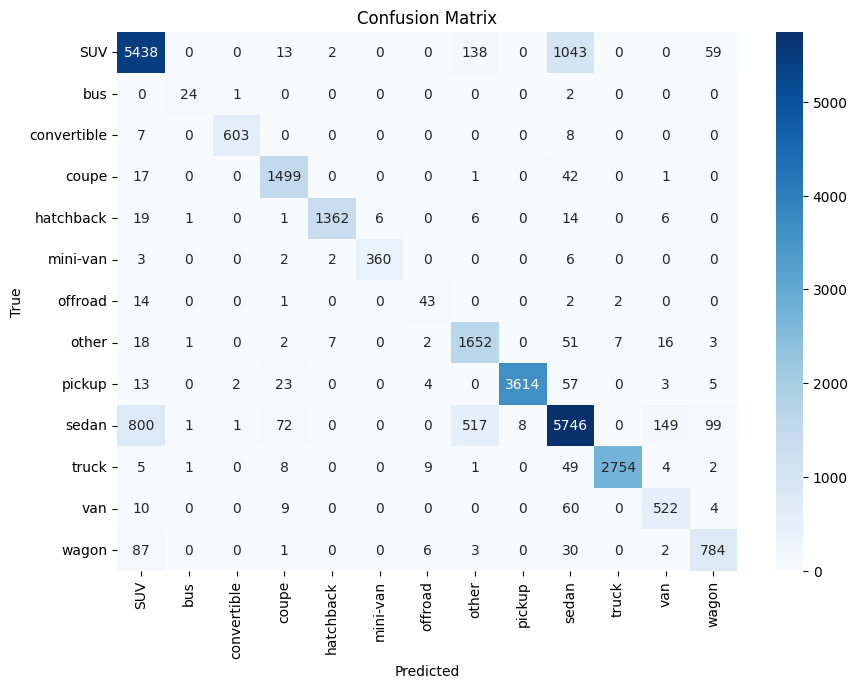

In [ ]:
clf_nb = BernoulliNB()
model_fit_and_evaluate(clf_nb, X_train, y_train, X_val, y_val, class_names=le.classes_, average = 'weighted', visualize_cm=True)

* Training the model was very fast, which is great! About two seconds.
* We got outstanding performance for such a simple model. About 87% on the validation set. This is a very good start.
* Clearly we have not fallen into overfitting.

### **LogisticRegression**

* **Logistic Regression** is a linear model that assumes linear relationships between the independent variables and the log odds of the dependent variable. If the relationship between our features and the vehicle type is complex and nonlinear, Logistic Regression might struggle to capture these relationships.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Total execution time: 261.5212790966034 seconds
Evaluation on Test Set:
Accuracy: 0.954990704990705
Precision: 0.9556263560190055
Recall: 0.954990704990705
F1 Score: 0.9550967373499698
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.92      0.94      0.93      6693
         bus       1.00      0.93      0.96        27
 convertible       1.00      0.98      0.99       618
       coupe       0.99      0.98      0.98      1560
   hatchback       1.00      0.97      0.99      1415
    mini-van       1.00      0.97      0.98       373
     offroad       0.94      0.74      0.83        62
       other       0.99      0.97      0.98      1759
      pickup       0.99      0.99      0.99      3721
       sedan       0.93      0.95      0.94      7393
       truck       0.99      0.98      0.99      2833
         van       0.98      0.88      0.92       605
       wagon       0.97      0.89      0.93      

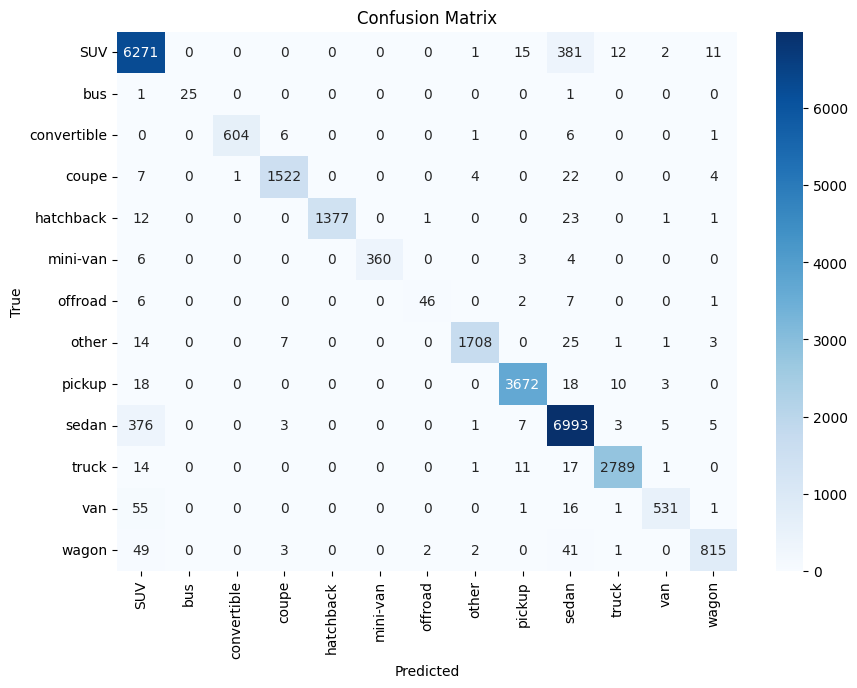

In [ ]:
log_reg = LogisticRegression(solver='saga', penalty='l2', C=1.0, max_iter=100, multi_class='multinomial')

'''
params_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000, 1500]
}

log_reg = get_best_model_GridSearchCV(log_reg, X_train, y_train, params_grid)
'''

model_fit_and_evaluate(log_reg, X_train, y_train, X_val, y_val, class_names=le.classes_, feature_imp=True, average = 'weighted', visualize_cm=True)

* Training the model was resonable. About 4,3 minutes. But it is much longer compared to the NB model.
* We got great performance. About 96% on the validation set.
* Clearly we have not fallen into overfitting.

### **Decision Tree Classifier**

* Decision trees are non-linear models that can capture complex relationships between features and the target.
* One of the strengths of decision trees is their interpretability. The decisions made by the model can be traced back and understood, which could be valuable for understanding how vehicle types are being classified based on the given features.


Total execution time: 3.24013352394104 seconds
Evaluation on Test Set:
Accuracy: 0.965000715000715
Precision: 0.9651273378285722
Recall: 0.965000715000715
F1 Score: 0.9650297760543055
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6693
           1       1.00      1.00      1.00        27
           2       0.99      0.99      0.99       618
           3       0.99      0.99      0.99      1560
           4       0.99      0.98      0.99      1415
           5       0.98      0.97      0.97       373
           6       0.84      0.76      0.80        62
           7       0.99      0.97      0.98      1759
           8       0.99      0.99      0.99      3721
           9       0.95      0.95      0.95      7393
          10       0.99      0.99      0.99      2833
          11       0.97      0.95      0.96       605
          12       0.95      0.93      0.94       

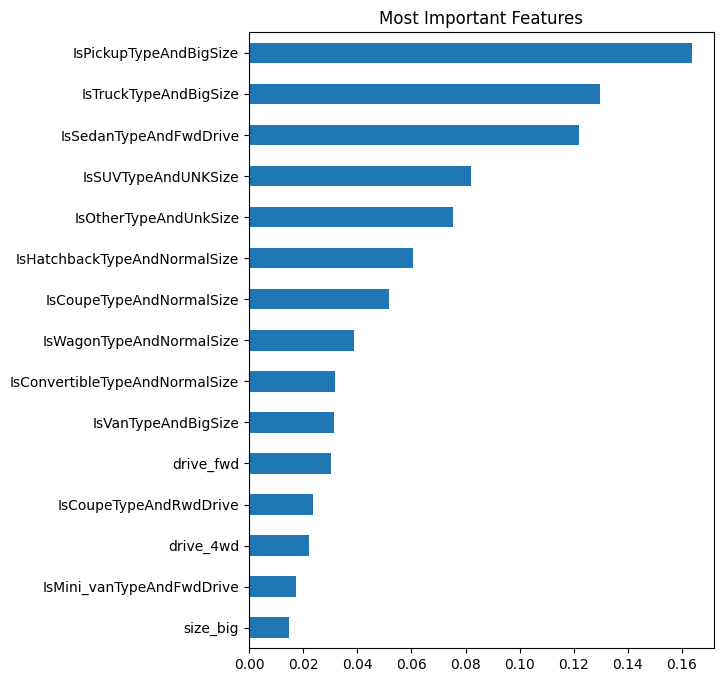

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=2024)

'''
params_grid = {
    'criterion': ['gini', 'entropy'], # Criterion for measuring the quality of a split.
    'splitter': ['best', 'random'], # Strategy used to choose the split at each node.
    'max_depth': [None, 10, 20, 30, 40, 50], # Maximum depth of the tree.
    'min_samples_split': [2, 5, 10, 20], # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4, 10], # Minimum number of samples required to be at a leaf node.
    'max_features': [None, 'auto', 'sqrt', 'log2'], # Number of features to consider when looking for the best split.
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50], # Grow a tree with max_leaf_nodes in best-first fashion.
    'min_impurity_decrease': [0.0, 0.01, 0.02, 0.05], # A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
}

clf_dt= get_best_model_GridSearchCV(clf_dt, X_train, y_train, params_grid)
'''

model_fit_and_evaluate(clf_dt, X_train, y_train, X_val, y_val, feature_imp=True, average = 'weighted')

* Training the model was very fast. About 3 sec! Alongside a sophisticated performance 97% on the validation set.
* Clearly we have not fallen into overfitting.

### **XGBoost**


* [XGBoost](https://xgboost.readthedocs.io/en/stable/), which stands for eXtreme Gradient Boosting (It is a development of the idea of a decision tree), is a highly efficient and flexible gradient boosting library. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.
* It builds the model in a stage-wise fashion like other boosting methods but generalizes them by allowing optimization of arbitrary differentiable loss functions.
* We can expect XGBoost to perform robustly on this task.

Total execution time: 266.3780007362366 seconds
Evaluation on Test Set:
Accuracy: 0.9665022165022165
Precision: 0.9666772288822714
Recall: 0.9665022165022165
F1 Score: 0.9665386046656927
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.94      0.95      0.95      6693
         bus       1.00      1.00      1.00        27
 convertible       1.00      0.98      0.99       618
       coupe       0.99      0.99      0.99      1560
   hatchback       1.00      0.98      0.99      1415
    mini-van       0.99      0.97      0.98       373
     offroad       0.89      0.76      0.82        62
       other       0.99      0.97      0.98      1759
      pickup       0.99      0.99      0.99      3721
       sedan       0.95      0.96      0.95      7393
       truck       0.99      0.99      0.99      2833
         van       0.98      0.95      0.96       605
       wagon       0.95      0.93      0.94    

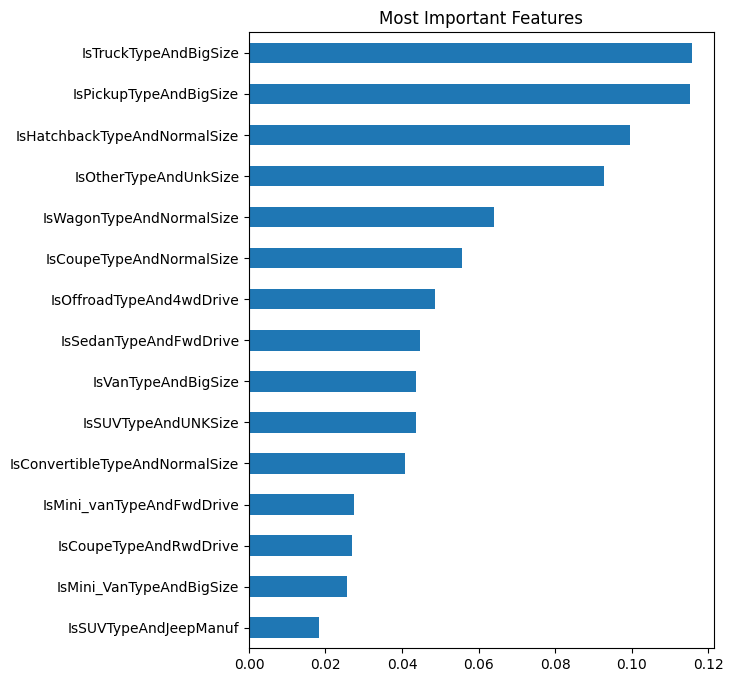

In [ ]:
'''
  using GridSearchCV with a large dataset and a model like XGBoost
  can be computationally expensive and time-consuming, especially
  with high values for n_estimators and max_depth, or if you expand the parameter grid.
  Instead, using RandomizedSearchCV, which samples a given number of parameter combinations
  from the parameter space and evaluates those. It's often much faster and can provide nearly
  as good results as the exhaustive grid search.
'''
clf_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=150, # The number of trees in the forest or the number of boosting rounds.
    max_depth=25, # Controls the maximum depth of the trees. Deep trees can model more complex patterns but might lead to overfitting.
    learning_rate=0.1, # Also known as eta, it makes the model more robust by shrinking the weights on each step. Tuning this parameter can help prevent overfitting.
    subsample=0.8,  # Using a subset of data to prevent overfitting (0.8 means 80% of data)
    colsample_bytree=0.8,  # Using a subset of features to prevent overfitting
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    reg_lambda=1.2,  # L2 regularization term on weights. Increasing it  make model more conservative.
    seed=2024  # For reproducibility
)

'''
param_distributions = {
    'n_estimators': randint(100, 1000),  # Example of integer range
    'learning_rate': uniform(0.01, 0.1),  # Example of continuous range
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),  # 0.5 to 1.0
    'colsample_bytree': uniform(0.3, 0.7)  # 0.3 to 1.0
}

clf_xgb=get_best_model_RandomizedSearchCV(clf_xgb, X_train, y_train, param_distributions)
'''

model_fit_and_evaluate(clf_xgb, X_train, y_train, X_val, y_val, class_names=le.classes_, feature_imp=True, average = 'weighted')

* The improvement in performance over the decision tree model is negligible. The model training time is also much longer.

## **Final results**

We will now test the models' performance on data they have never seen. This will provide us with a good understanding of the models' ability to generalize

In [ ]:
y_test= test_data.type
X_test= test_data.drop('type',axis=1)

print (y_test.shape, y_test.shape)

(31004,) (31004,)


### **Naive Bayes Classifier**

Accuracy: 0.8764352986711392
Precision: 0.8791319016555528
Recall: 0.8764352986711392
F1 Score: 0.8767997651762501
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.85      0.82      0.83      7372
         bus       0.88      0.85      0.87        27
 convertible       1.00      0.97      0.99       713
       coupe       0.91      0.96      0.94      1681
   hatchback       0.99      0.97      0.98      1530
    mini-van       0.98      0.96      0.97       452
     offroad       0.62      0.63      0.63        57
       other       0.73      0.93      0.82      1994
      pickup       1.00      0.97      0.99      4020
       sedan       0.81      0.79      0.80      8109
       truck       1.00      0.98      0.99      3246
         van       0.81      0.84      0.82       780
       wagon       0.83      0.86      0.85      1023

    accuracy                           0.88     31004
   macro a

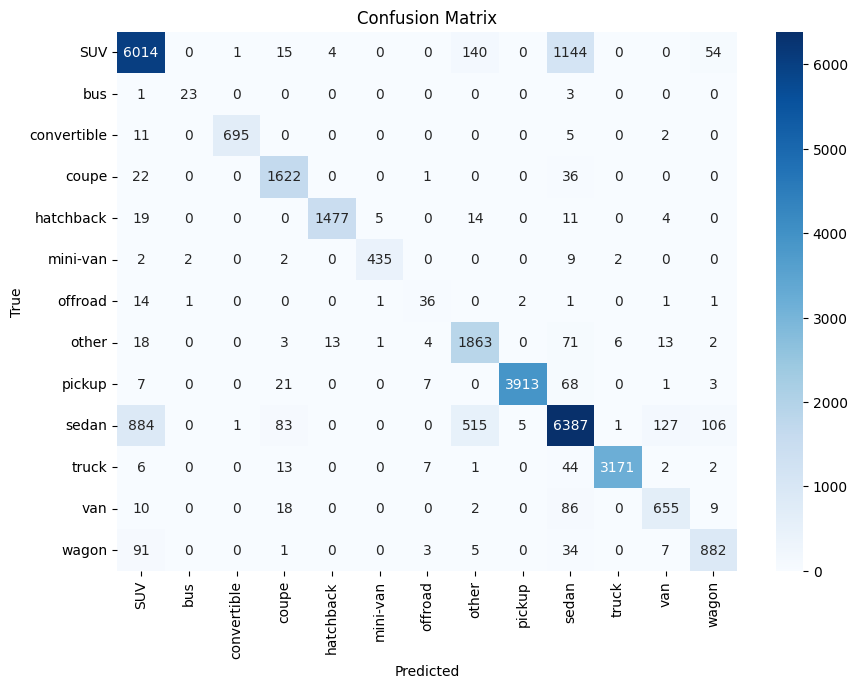

In [ ]:
evaluate(clf_nb, X_test, y_test, class_names=le.classes_, visualize_cm=True)

* An 88% score using the BernoulliNB model is quite respectable, especially considering the simplicity of the model.
* This result is similar to the result we also obtained from the training and validation data, and this indicates that the model is able to generalize and did not fall into overfitting.
* Assumptions of Naive Bayes, such as feature independence, might limit its ability to model the more complex or subtle patterns present in the data.
* The success of a simpler model like BernoulliNB also indicates that there's a strong signal in our data that is relatively straightforward to capture.

### **LogisticRegression**

Accuracy: 0.9538124113017675
Precision: 0.9545490311972998
Recall: 0.9538124113017675
F1 Score: 0.9538896743294761
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.92      0.93      0.93      7372
         bus       1.00      0.89      0.94        27
 convertible       1.00      0.98      0.99       713
       coupe       0.99      0.98      0.99      1681
   hatchback       1.00      0.97      0.99      1530
    mini-van       1.00      0.98      0.99       452
     offroad       0.98      0.70      0.82        57
       other       0.99      0.97      0.98      1994
      pickup       0.99      0.99      0.99      4020
       sedan       0.92      0.95      0.93      8109
       truck       0.99      0.98      0.99      3246
         van       0.99      0.86      0.92       780
       wagon       0.97      0.89      0.93      1023

    accuracy                           0.95     31004
   macro a

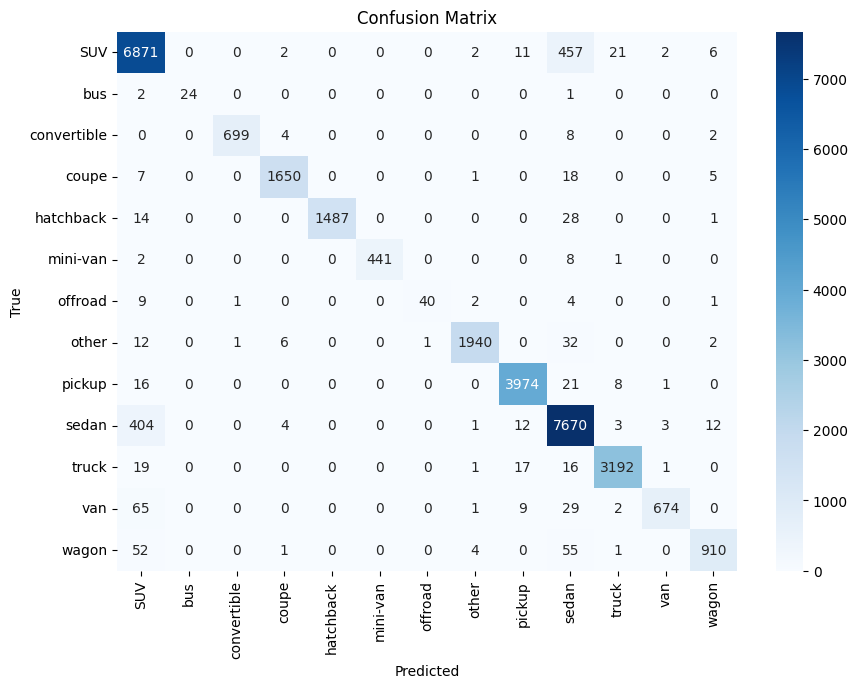

In [ ]:
evaluate(log_reg, X_test, y_test, class_names=le.classes_, visualize_cm=True)

* Great! We got about 95% F1-Score (weighted).
* This result is similar to the result we also obtained from the training and validation data, and this indicates that the model is able to generalize and did not fall into overfitting.
* The high performance of Logistic Regression suggests that the linear separability of classes in the transformed feature space is high.
* Logistic Regression algorithm was able to capture the underlying patterns in the data well.

### **Decision Tree Classifier**

Accuracy: 0.9670365114178816
Precision: 0.9672223393036272
Recall: 0.9670365114178816
F1 Score: 0.9670575407708359
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.94      0.95      0.95      7372
         bus       0.96      1.00      0.98        27
 convertible       0.98      0.98      0.98       713
       coupe       0.99      0.99      0.99      1681
   hatchback       1.00      0.98      0.99      1530
    mini-van       0.99      0.98      0.98       452
     offroad       0.94      0.77      0.85        57
       other       0.99      0.98      0.98      1994
      pickup       0.99      0.99      0.99      4020
       sedan       0.95      0.96      0.95      8109
       truck       0.99      0.99      0.99      3246
         van       0.97      0.93      0.95       780
       wagon       0.97      0.92      0.94      1023

    accuracy                           0.97     31004
   macro a

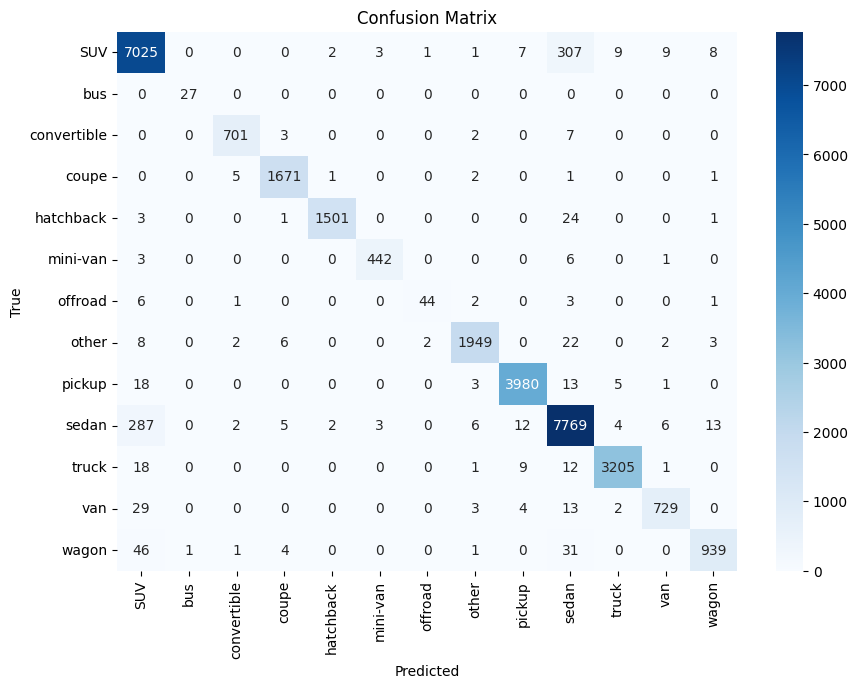

In [ ]:
evaluate(clf_dt, X_test, y_test, class_names=le.classes_, visualize_cm=True)

* We got about 97% F1-Score (weighted).
* This result is similar to the result we also obtained from the training and validation data, and this indicates that the model is able to generalize and did not fall into overfitting.
* It is an excellent result.
* This high level of score emphasizes that our preprocessing steps, feature engineering, and handling of categorical and numerical data have been very effective in preparing the dataset for modeling.

### **XGBoost**


Accuracy: 0.9674558121532706
Precision: 0.9676903396057099
Recall: 0.9674558121532706
F1 Score: 0.9675013423603628
--------------------------------------------------------------
              precision    recall  f1-score   support

         SUV       0.95      0.95      0.95      7372
         bus       1.00      1.00      1.00        27
 convertible       0.99      0.98      0.99       713
       coupe       0.99      0.99      0.99      1681
   hatchback       1.00      0.98      0.99      1530
    mini-van       0.99      0.98      0.98       452
     offroad       0.90      0.77      0.83        57
       other       0.99      0.98      0.99      1994
      pickup       0.99      0.99      0.99      4020
       sedan       0.94      0.96      0.95      8109
       truck       0.99      0.99      0.99      3246
         van       0.98      0.93      0.96       780
       wagon       0.97      0.92      0.95      1023

    accuracy                           0.97     31004
   macro a

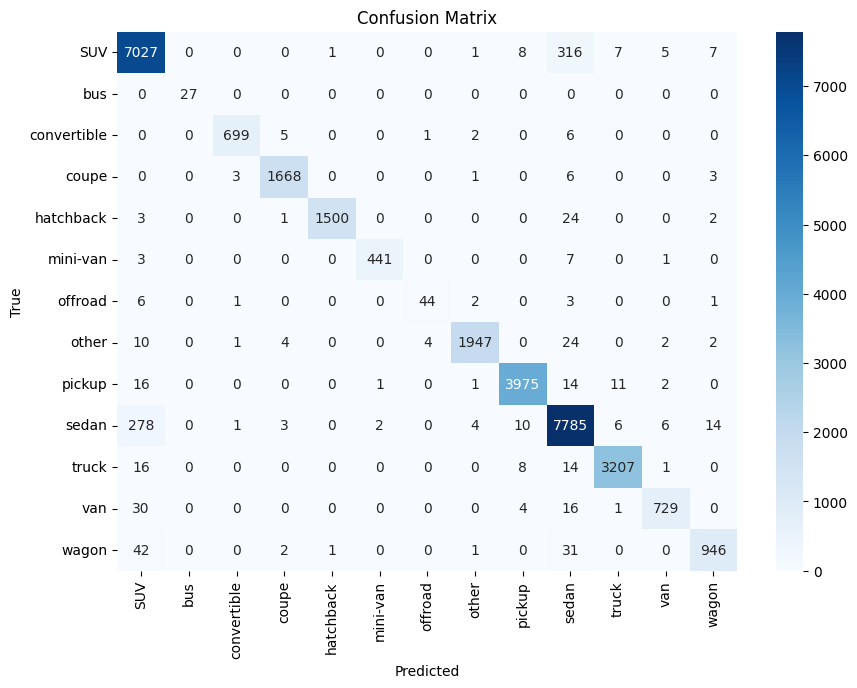

In [ ]:
evaluate(clf_xgb, X_test, y_test, class_names=le.classes_, visualize_cm=True)

* We got about 97% F1-Score (weighted).
* This result is similar to the result we also obtained from the training and validation data, and this indicates that the model is able to generalize and did not fall into overfitting.

## **Performance Overview**

We'll consider several factors: accuracy, precision, recall, F1 score, and training time. These metrics give us a comprehensive view of each model's effectiveness and efficiency.

- **Accuracy**: The proportion of true results (both true positives and true negatives) among the total number of cases examined.
- **Precision**: The proportion of true positive results in the set of all samples that were identified as positive.
- **Recall (Sensitivity)**: The proportion of true positive results in the set of all samples that should have been identified as positive.
- **F1 Score**: The harmonic mean of precision and recall, providing a single metric to assess the balance between them.
- **Training Time**: How long it takes to train the model.

<br>
<br>

### **Model Comparisons**

1. **Bernoulli Naive Bayes**
   - Accuracy: 0.876
   - Precision: 0.88
   - Recall: 0.87
   - F1 Score: 0.87
   - Training Time: 2 seconds

2. **Logistic Regression**
   - Accuracy: 0.95
   - Precision: 0.95
   - Recall: 0.95
   - F1 Score: 0.95
   - Training Time: 4 minutes

3. **Decision Tree**
   - Accuracy: 0.967
   - Precision: 0.967
   - Recall: 0.967
   - F1 Score: 0.967
   - Training Time: 3 seconds

4. **XGBoost**
   - Accuracy: 0.967
   - Precision: 0.967
   - Recall: 0.967
   - F1 Score: 0.967
   - Training Time: 4 minutes

<br>
<br>

### **Analysis**


- **Performance**: The Decision Tree and XGBoost models have the highest performance metrics across the board, with accuracy, precision, recall, and F1 scores all at 0.967. XGBoost is an ensemble of decision trees that uses gradient boosting to reduce bias and variance, which explains its high performance. However, it performs similarly to a single Decision Tree in this specific case, the identical performance of a single Decision Tree and XGBoost suggests that the dataset and the task might not be complex enough to benefit from the advanced features of XGBoost. This scenario exemplifies the concept of diminishing returns, where adding more complexity (in terms of a more sophisticated algorithm like XGBoost) does not yield a proportional improvement in performance over a simpler model (like a single Decision Tree).Logistic Regression shows a significant improvement over Bernoulli Naive Bayes, which indicates that the decision boundary for classifying the types of vehicles is likely not linearly separable with simple probabilities. LR, with its capability to handle linear relationships, outperforms BNB here.
- **Efficiency**: In terms of training time, the Bernoulli Naive Bayes and Decision Tree models are the most efficient, with training times of 2 seconds and 3 seconds, respectively. Logistic Regression and XGBoost, while having higher performance metrics, require significantly more training time (4 minutes each). BNB makes predictions based on the Bayes theorem with strong (naive) independence assumptions between the features, and DT splits the data on features that result in the most information gain. Both are less computationally intensive than LR and XGBoost.
- **Best Overall**: Considering a balance between performance and efficiency, the **Decision Tree** model emerges as a strong contender, offering high accuracy, precision, recall, and F1 scores, with a very short training time.

